In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


MeasureId                                        MeasureName MeasureType  \
0         83  Number of days with maximum 8-hour average ozo...      Counts   
1         83  Number of days with maximum 8-hour average ozo...      Counts   
2         83  Number of days with maximum 8-hour average ozo...      Counts   
3         83  Number of days with maximum 8-hour average ozo...      Counts   
4         83  Number of days with maximum 8-hour average ozo...      Counts   

  StratificationLevel  StateFips StateName  CountyFips CountyName  ReportYear  \
0      State x County          1   Alabama        1027       Clay        1999   
1      State x County          1   Alabama        1051     Elmore        1999   
2      State x County          1   Alabama        1073  Jefferson        1999   
3      State x County          1   Alabama        1079   Lawrence        1999   
4      State x County          1   Alabama        1089    Madison        1999   

   Value      Unit  UnitName    DataOrigin  MonitorOnly  
0   33.0  No Units  No Units  Monitor Only            1  
1    5.0  No Units  No Units  Monitor Only            1  
2   39.0  No Units  No Units  Monitor Only            1  
3   28.0  No Units  No Units  Monitor Only            1  
4   31.0  No Units  No Units  Monitor Only            1

# New section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Data types of each column
print("\nData Types:")
data_types = df.dtypes
print(data_types)



Missing Values:
MeasureId              0
MeasureName            0
MeasureType            0
StratificationLevel    0
StateFips              0
StateName              0
CountyFips             0
CountyName             0
ReportYear             0
Value                  0
Unit                   0
UnitName               0
DataOrigin             0
MonitorOnly            0
dtype: int64

Data Types:
MeasureId                int64
MeasureName             object
MeasureType             object
StratificationLevel     object
StateFips                int64
StateName               object
CountyFips               int64
CountyName              object
ReportYear               int64
Value                  float64
Unit                    object
UnitName                object
DataOrigin              object
MonitorOnly              int64
dtype: object


In [4]:
# Unique values for each column
print("\nUnique Values:")
unique_values = {column: df[column].unique() for column in df.columns}
for column, values in unique_values.items():
    print(f"\nColumn: {column}")
    print(values)


Unique Values:

Column: MeasureId
[ 83  85  86  84  87 292 293 294 295 296]

Column: MeasureName
['Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard'
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)'
 'Person-days with PM2.5 over the National Ambient Air Quality Standard'
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard'
 'Annual average ambient concentrations of PM2.5 in micrograms per cubic meter (based on seasonal averages and daily measurement)'
 'Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)'
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)'
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (mo

In [5]:
# Descriptive statistics grouped by MeasureName
measure_grouped = df.groupby('MeasureName')['Value'].describe()
print("Descriptive Statistics by MeasureName:\n", measure_grouped)

# Descriptive statistics grouped by StateName
state_grouped = df.groupby('StateName')['Value'].describe()
print("Descriptive Statistics by StateName:\n", state_grouped)

# Descriptive statistics grouped by ReportYear
year_grouped = df.groupby('ReportYear')['Value'].describe()
print("Descriptive Statistics by ReportYear:\n", year_grouped)


Descriptive Statistics by MeasureName:
                                                       count          mean  \
MeasureName                                                                 
Annual average ambient concentrations of PM 2.5...  34199.0  1.064170e+01   
Annual average ambient concentrations of PM2.5 ...   8422.0  1.122638e+01   
Number of days with maximum 8-hour average ozon...  10341.0  8.212262e+00   
Number of days with maximum 8-hour average ozon...  34199.0  4.106787e+00   
Number of person-days with PM2.5 over the Natio...  34199.0  5.858132e+05   
Number of person-days with maximum 8-hour avera...  10341.0  5.001122e+06   
Number of person-days with maximum 8-hour avera...  34199.0  1.280902e+06   
Percent of days with PM2.5 levels over the Nati...   9268.0  1.270835e+00   
Percent of days with PM2.5 levels over the Nati...  34199.0  4.760193e-01   
Person-days with PM2.5 over the National Ambien...   9268.0  2.864476e+06   

                                   

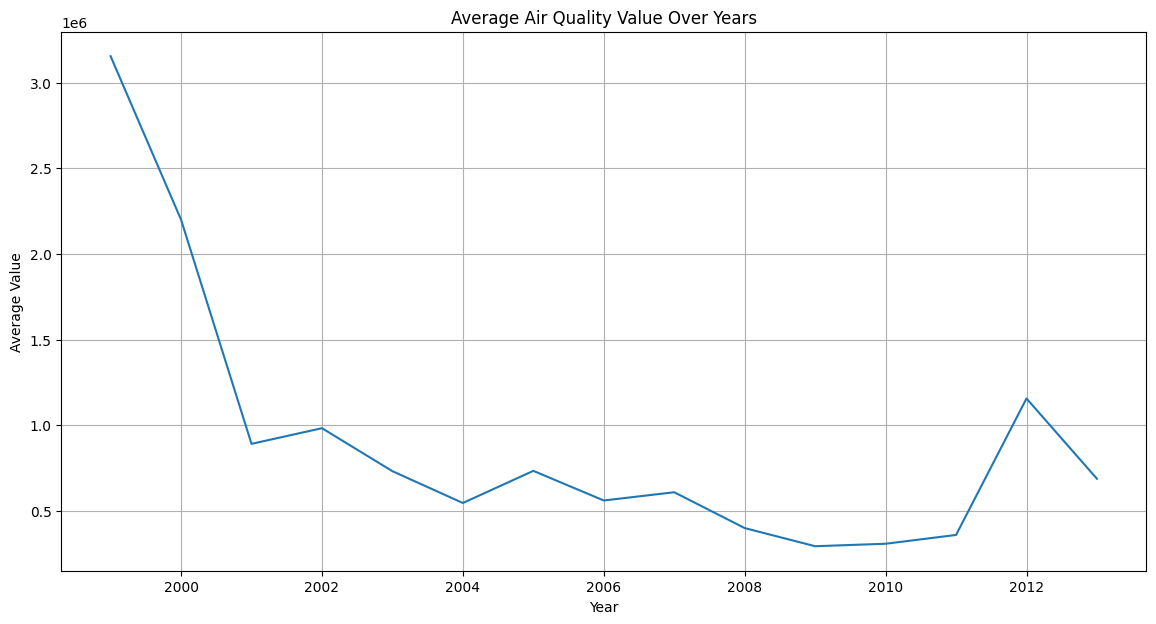

In [6]:
import matplotlib.pyplot as plt

# Time series plot for Value by ReportYear
plt.figure(figsize=(14, 7))
df.groupby('ReportYear')['Value'].mean().plot()
plt.title('Average Air Quality Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()


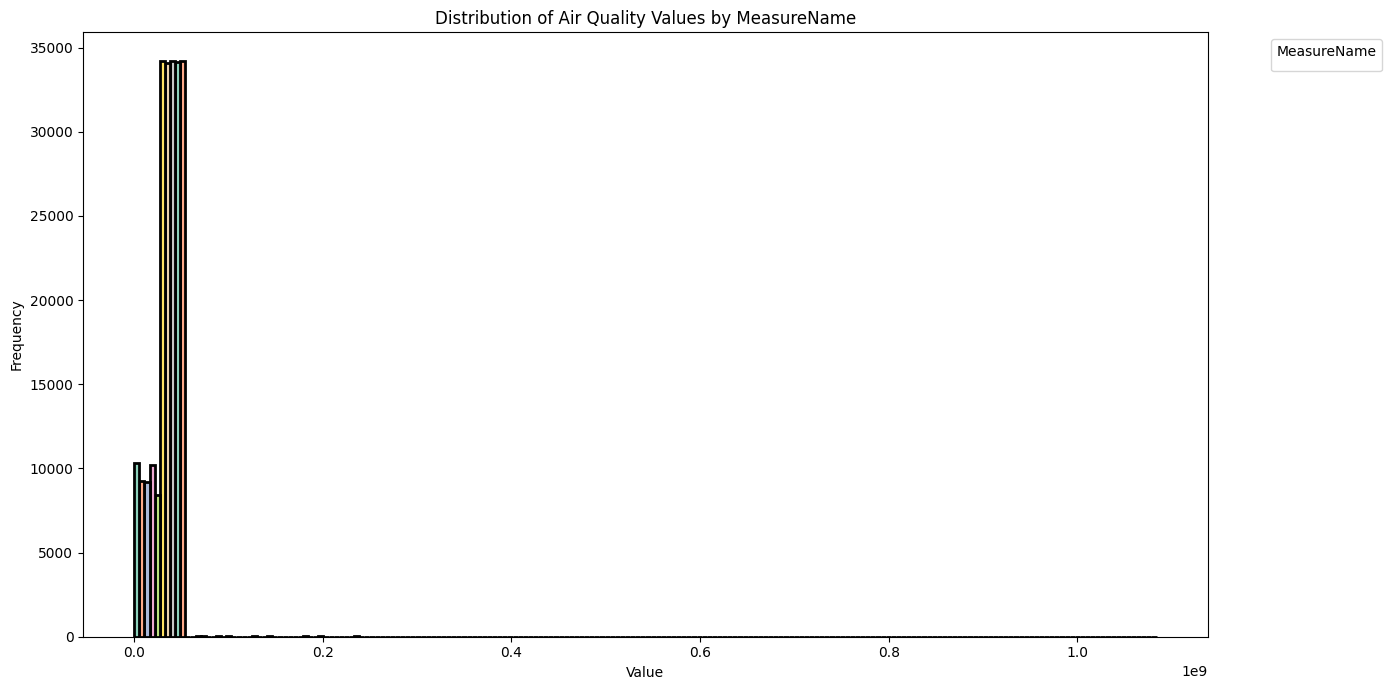

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(14, 7))

# Plot the histogram with better spacing and custom colors
sns.histplot(data=df, x='Value', hue='MeasureName', multiple='dodge', bins=20, palette="Set2", edgecolor="k", linewidth=2)

# Set titles and labels
plt.title('Distribution of Air Quality Values by MeasureName')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adjust the legend
plt.legend(title='MeasureName', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


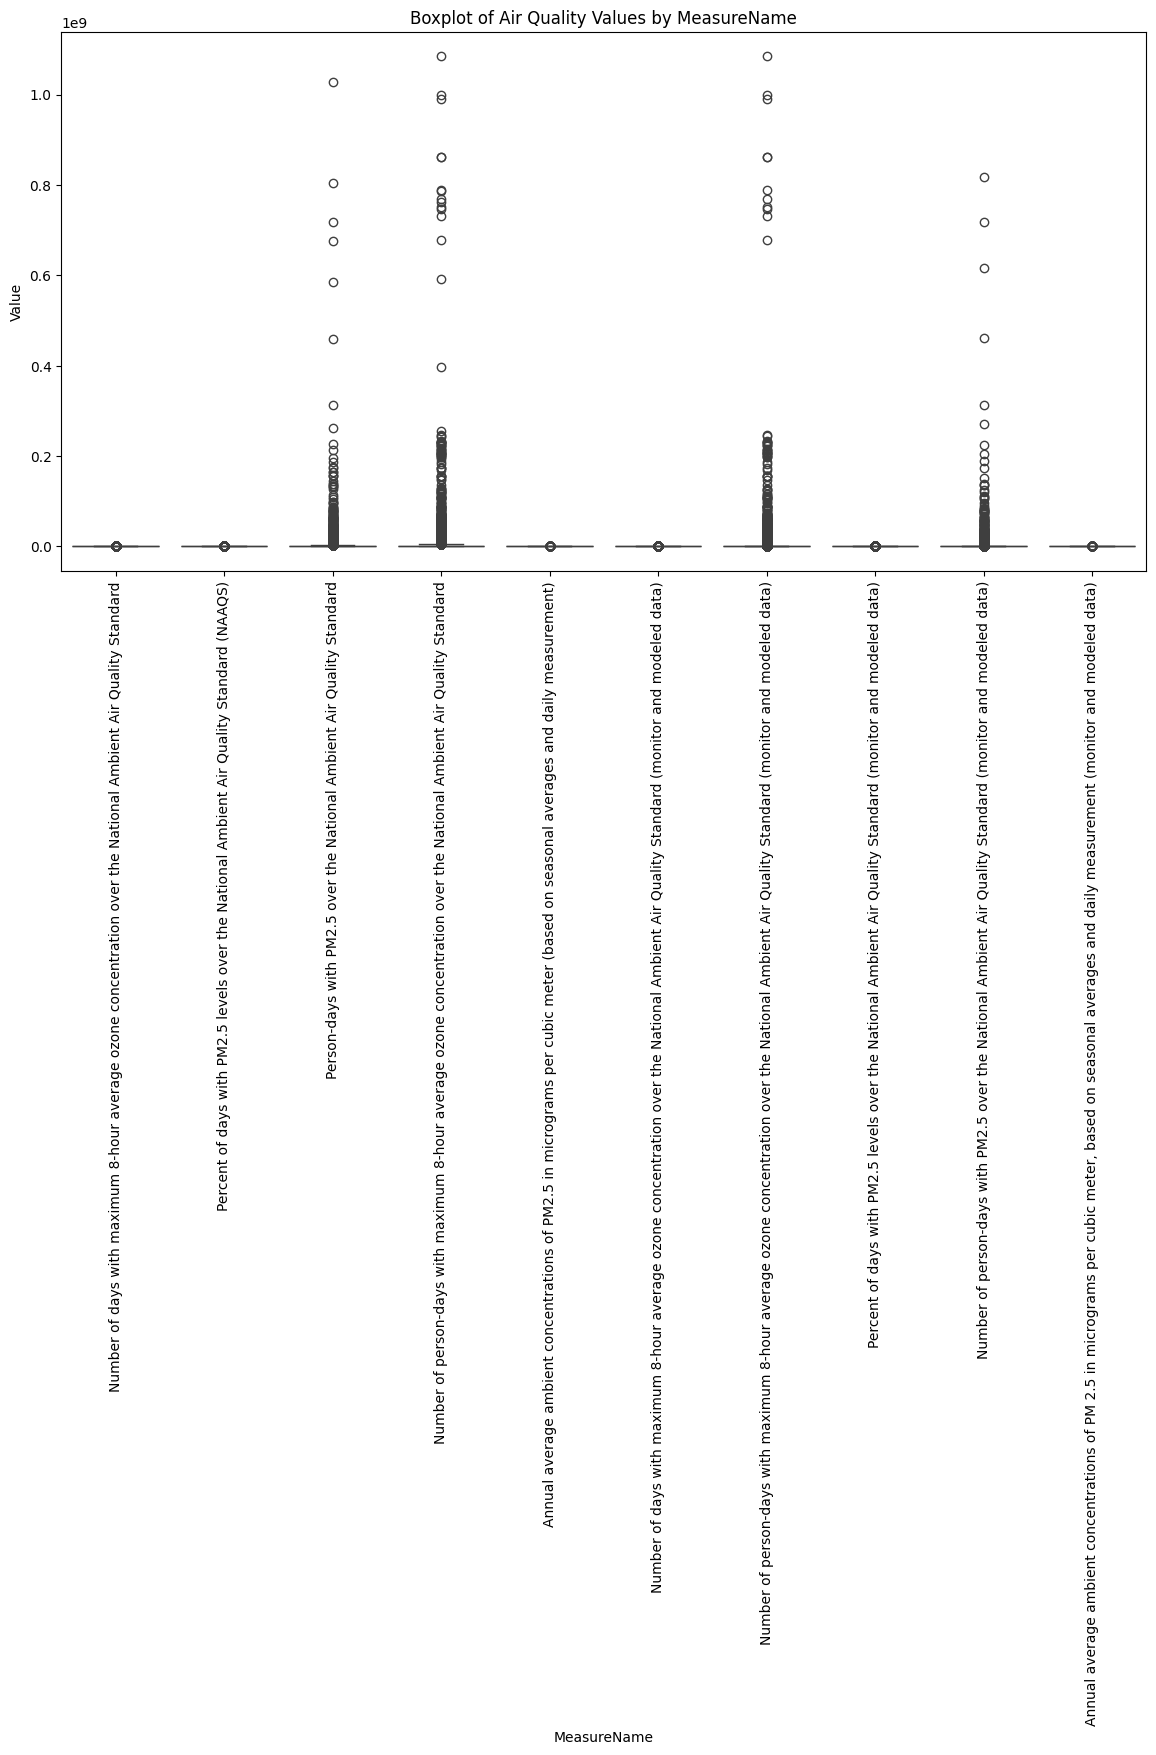

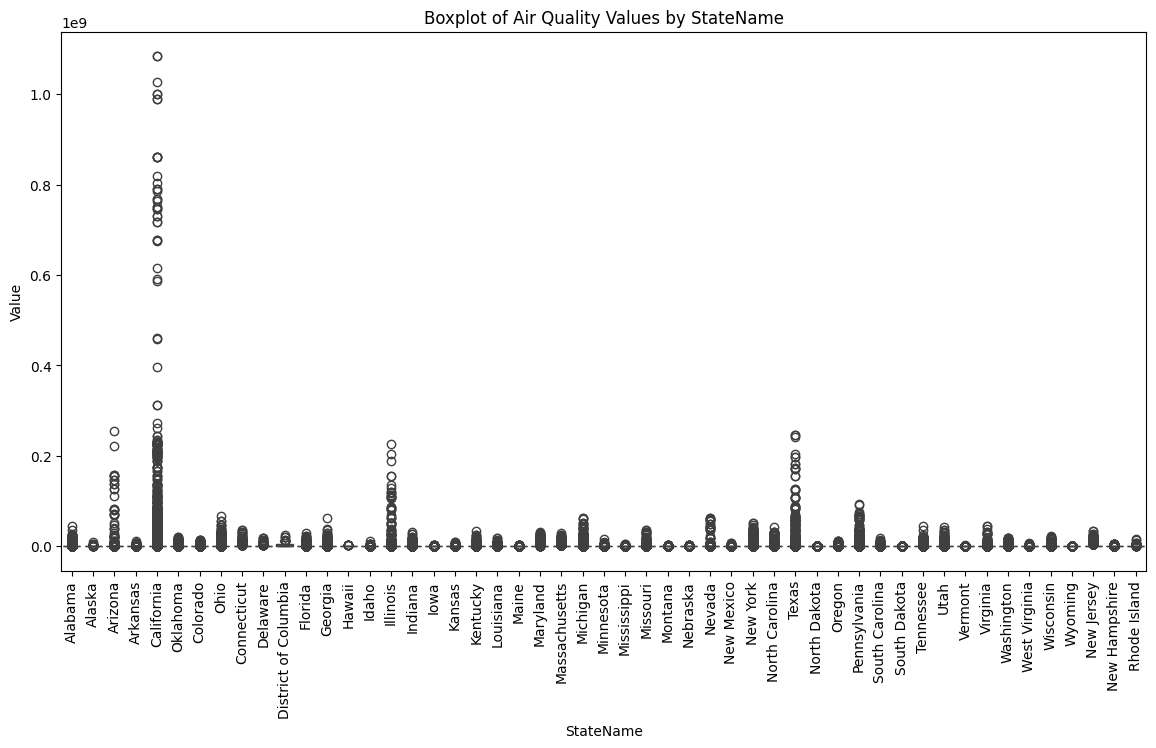

In [8]:
# Boxplot for Value by MeasureName
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='MeasureName', y='Value')
plt.title('Boxplot of Air Quality Values by MeasureName')
plt.xlabel('MeasureName')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

# Boxplot for Value by StateName
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='StateName', y='Value')
plt.title('Boxplot of Air Quality Values by StateName')
plt.xlabel('StateName')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


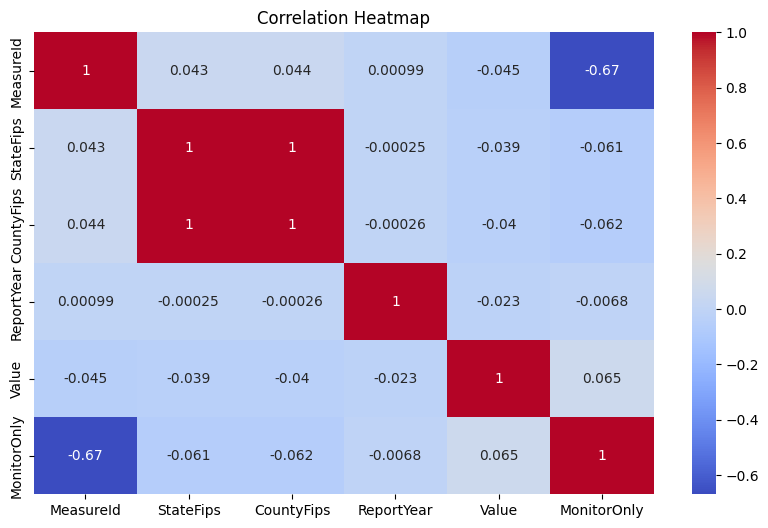

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


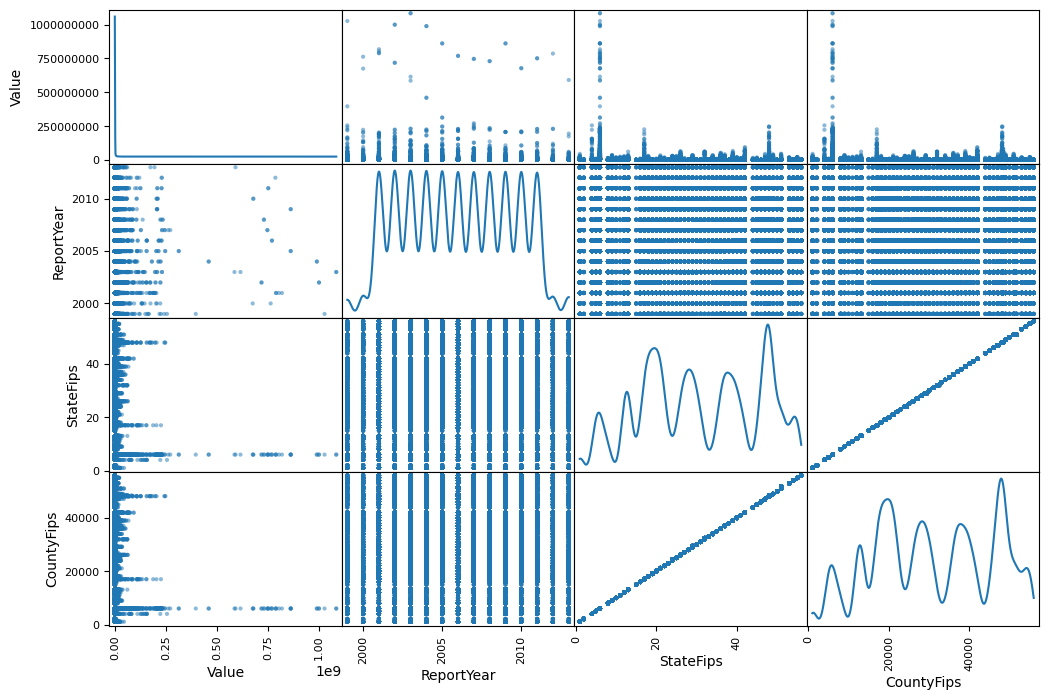

In [10]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix
attributes = ["Value", "ReportYear", "StateFips", "CountyFips"]
scatter_matrix(df[attributes], figsize=(12, 8), diagonal='kde')
plt.show()


In [11]:
# Pivot table for categorical analysis
pivot_table = df.pivot_table(values='Value', index='MeasureName', columns='StateName', aggfunc='mean')
print("Pivot Table:\n", pivot_table)



Pivot Table:
 StateName                                                Alabama  \
MeasureName                                                        
Annual average ambient concentrations of PM 2.5...  1.252632e+01   
Annual average ambient concentrations of PM2.5 ...  1.307561e+01   
Number of days with maximum 8-hour average ozon...  5.800000e+00   
Number of days with maximum 8-hour average ozon...  3.138399e+00   
Number of person-days with PM2.5 over the Natio...  3.192292e+05   
Number of person-days with maximum 8-hour avera...  1.637788e+06   
Number of person-days with maximum 8-hour avera...  4.067204e+05   
Percent of days with PM2.5 levels over the Nati...  1.427938e+00   
Percent of days with PM2.5 levels over the Nati...  5.454182e-01   
Person-days with PM2.5 over the National Ambien...  1.347541e+06   

StateName                                                  Alaska  \
MeasureName                                                         
Annual average ambient concentr

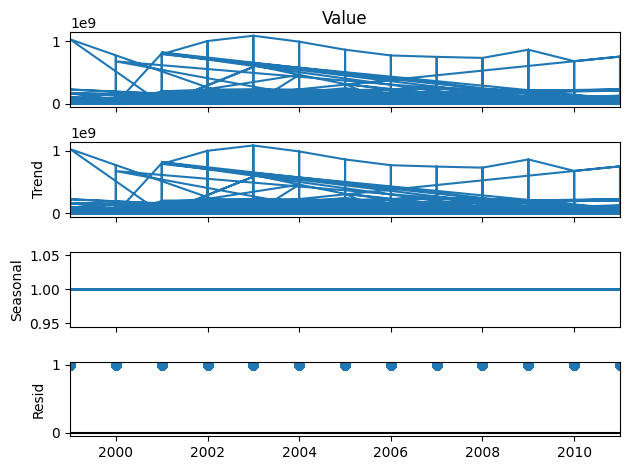

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming your dataframe is df and has 'ReportYear' and 'Value' columns
df['ReportYear'] = pd.to_datetime(df['ReportYear'], format='%Y')
df.set_index('ReportYear', inplace=True)

# Replace zero and negative values with a small positive value (e.g., 0.01)
df['Value'] = df['Value'].apply(lambda x: x if x > 0 else 0.01)

# Decompose the time series using multiplicative model
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='multiplicative', period=1)
decomposition.plot()
plt.show()


In [13]:
# Segment data by measurement type
measurement_types = df['MeasureType'].unique()
segmented_data = {measure_type: df[df['MeasureType'] == measure_type] for measure_type in measurement_types}

# Display segmented data
for measure_type, data in segmented_data.items():
    print(f"Measurement Type: {measure_type}")
    print(data.head())

Measurement Type: Counts
            MeasureId                                        MeasureName  \
ReportYear                                                                 
1999-01-01         83  Number of days with maximum 8-hour average ozo...   
1999-01-01         83  Number of days with maximum 8-hour average ozo...   
1999-01-01         83  Number of days with maximum 8-hour average ozo...   
1999-01-01         83  Number of days with maximum 8-hour average ozo...   
1999-01-01         83  Number of days with maximum 8-hour average ozo...   

           MeasureType StratificationLevel  StateFips StateName  CountyFips  \
ReportYear                                                                    
1999-01-01      Counts      State x County          1   Alabama        1027   
1999-01-01      Counts      State x County          1   Alabama        1051   
1999-01-01      Counts      State x County          1   Alabama        1073   
1999-01-01      Counts      State x County     

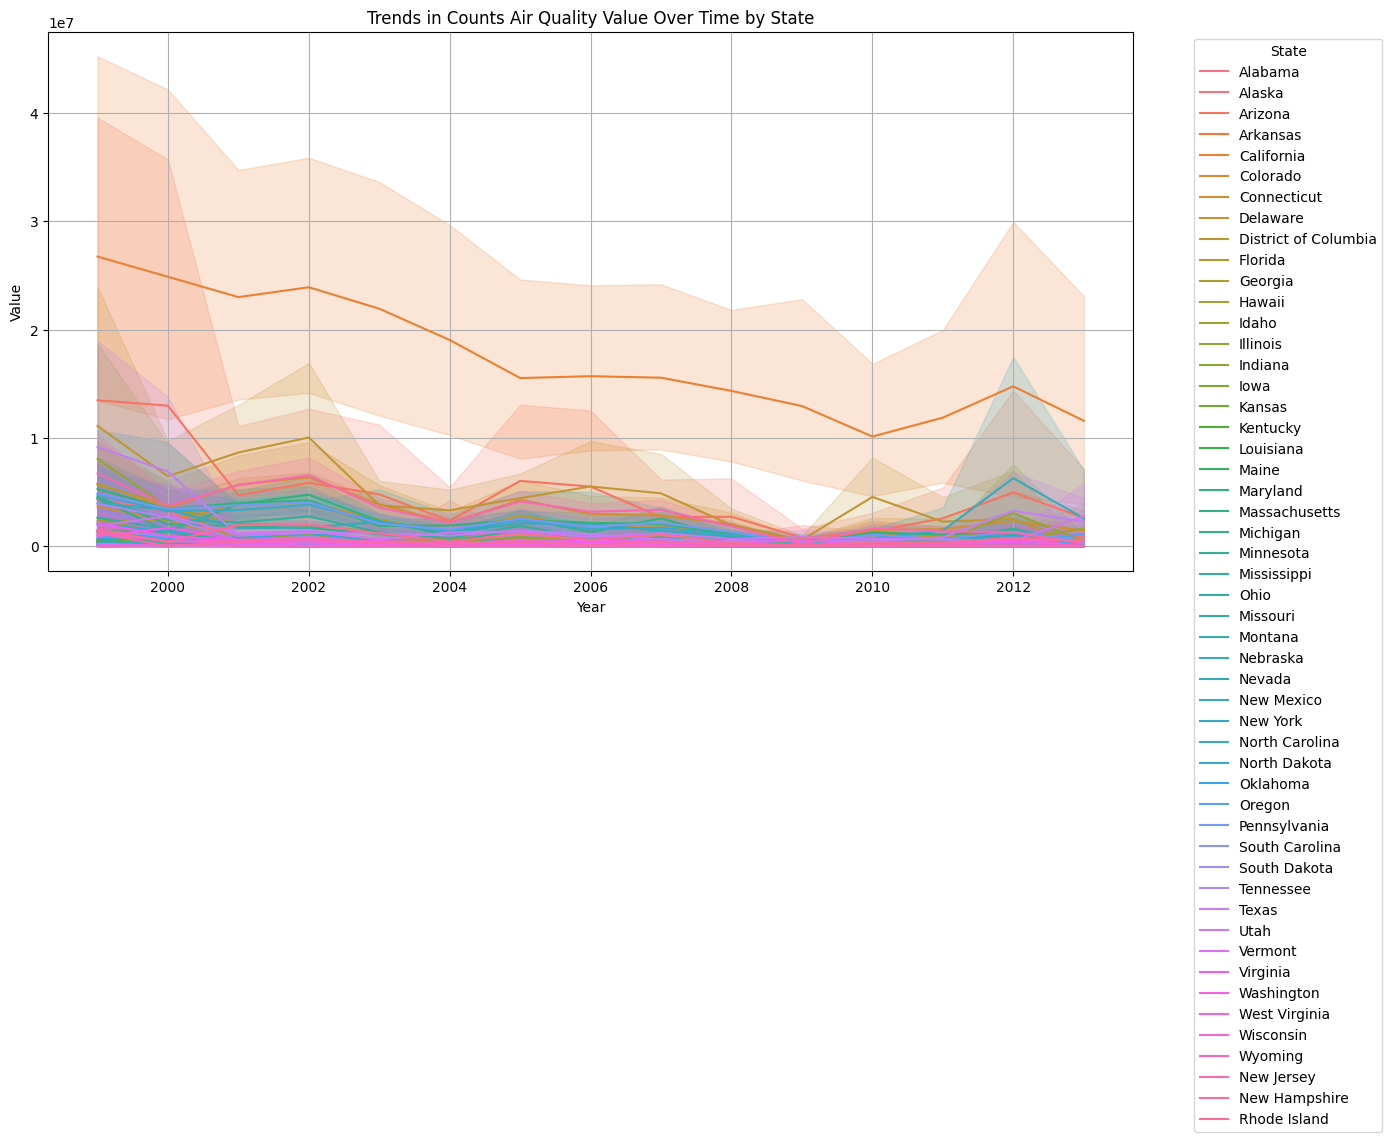

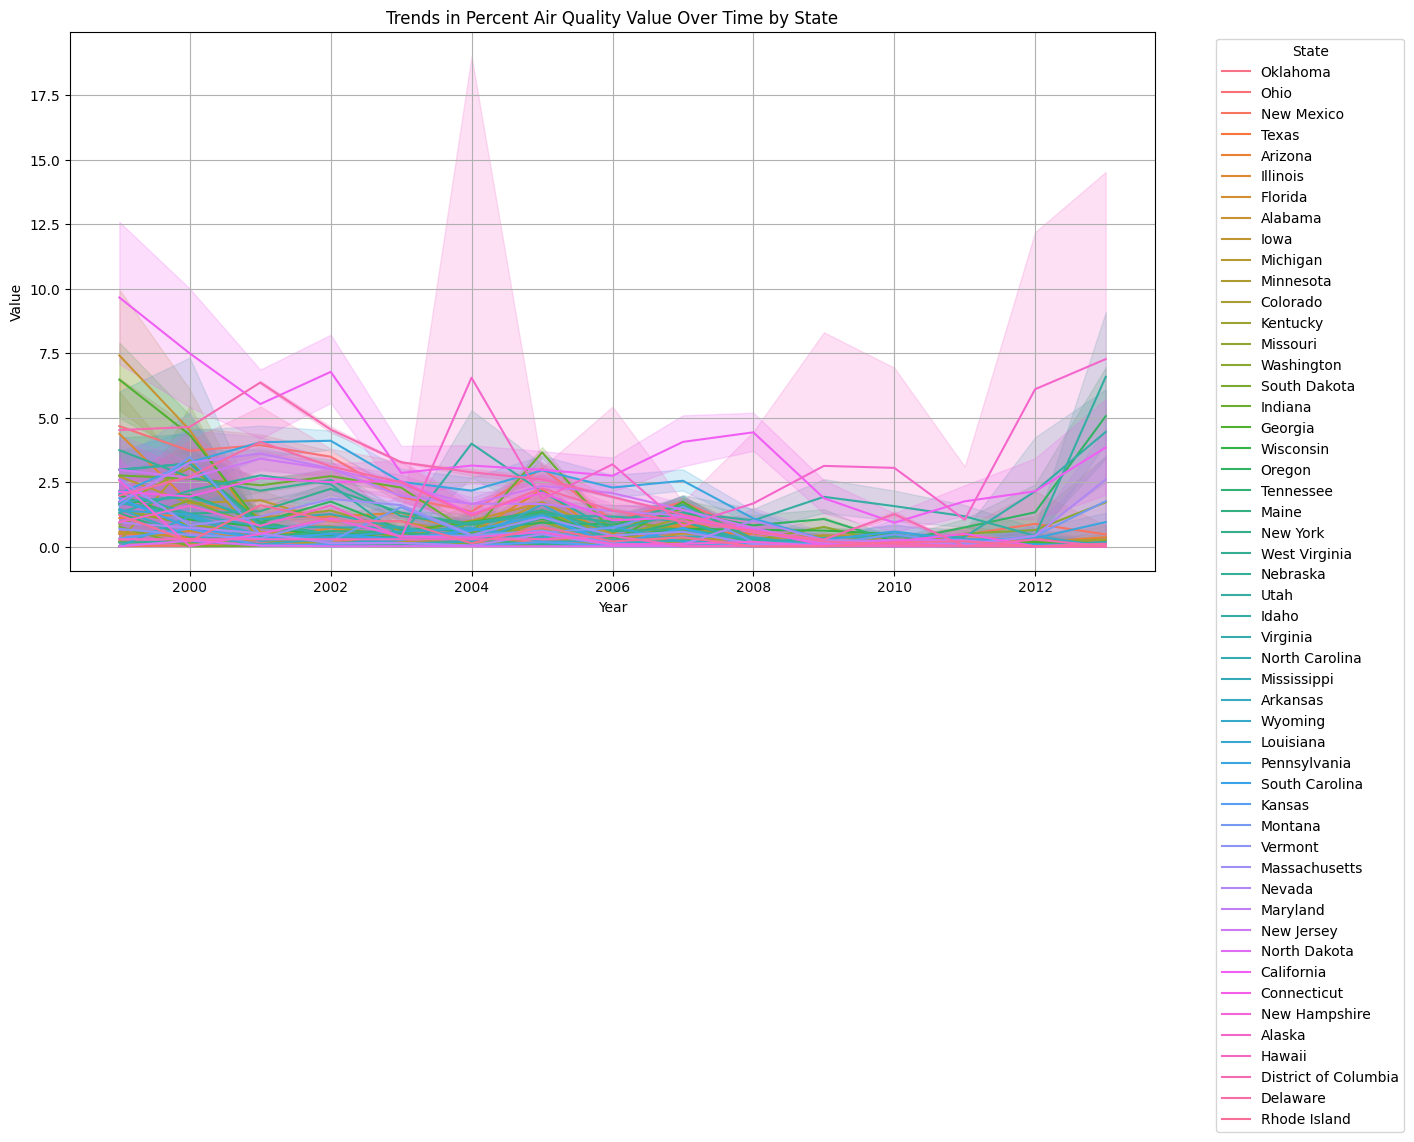

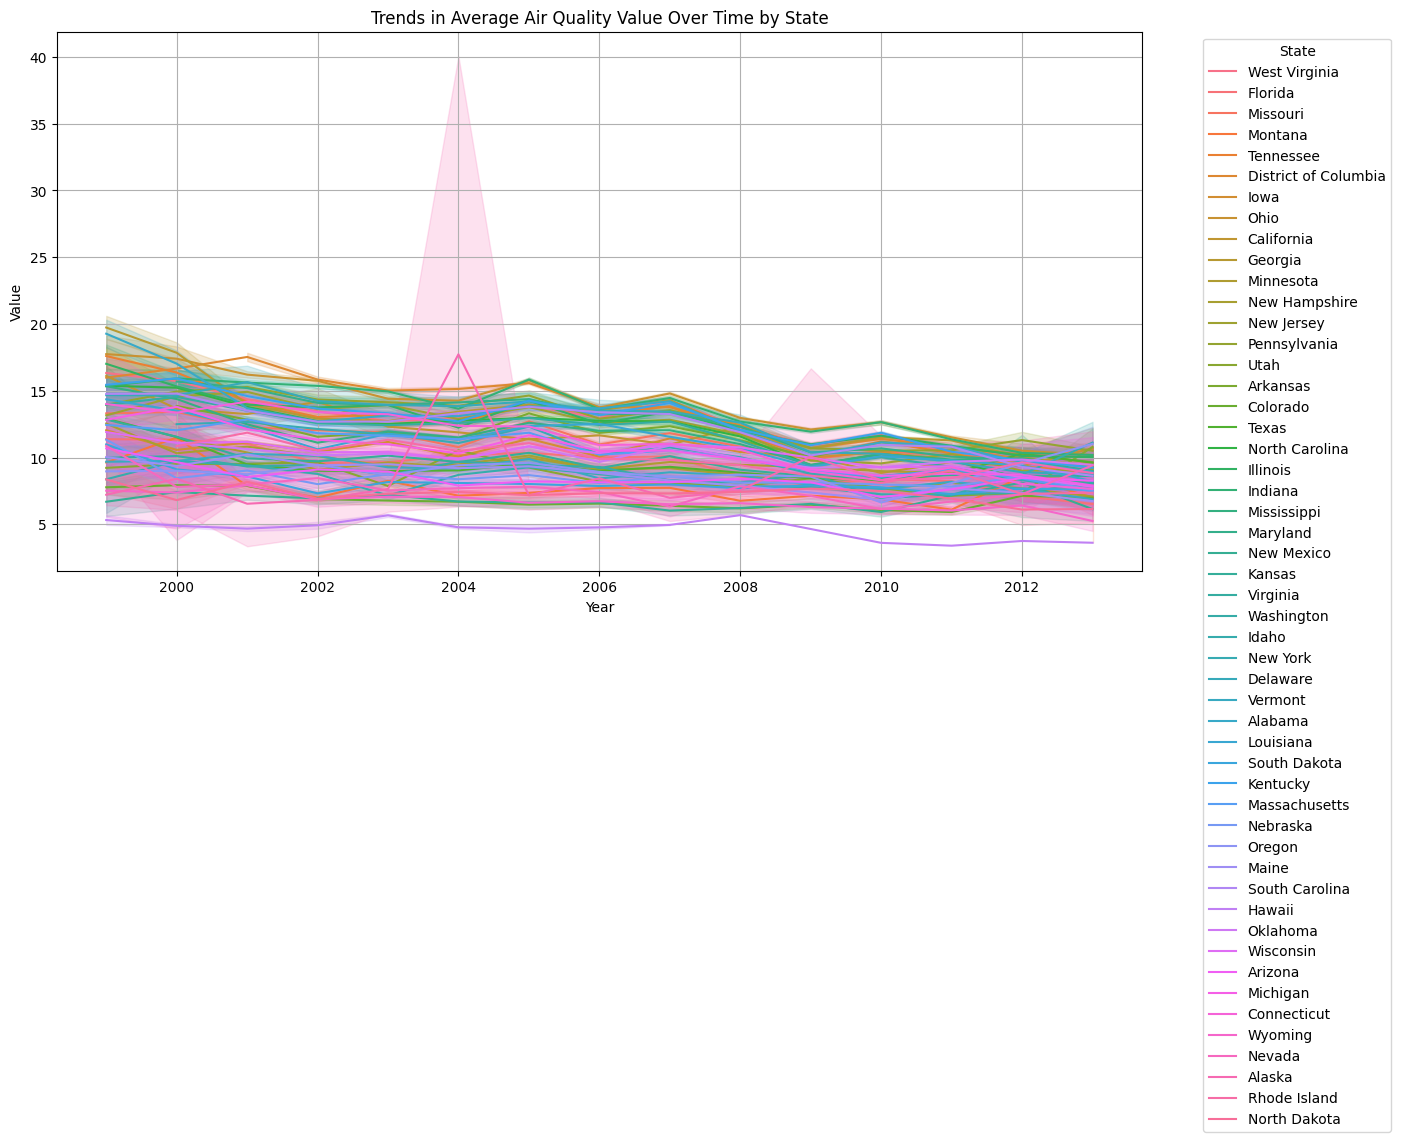

In [14]:
for measure_type, data in segmented_data.items():
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='ReportYear', y='Value', hue='StateName', data=data)
    plt.title(f'Trends in {measure_type} Air Quality Value Over Time by State')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


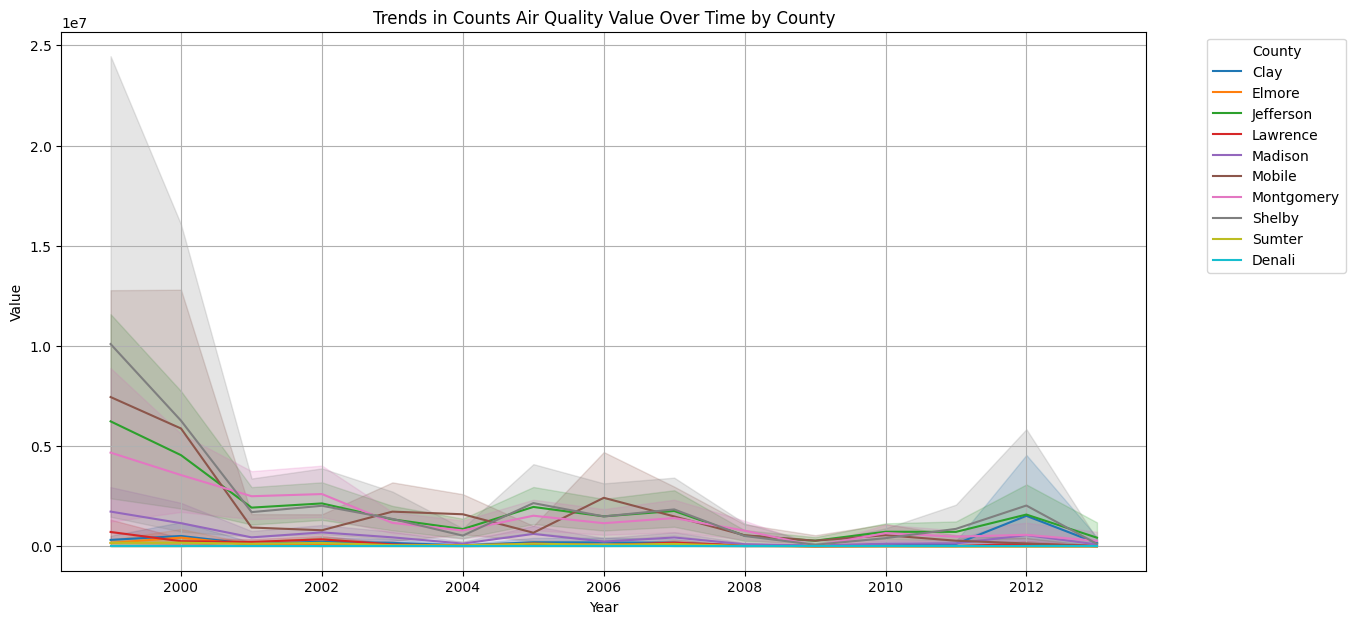

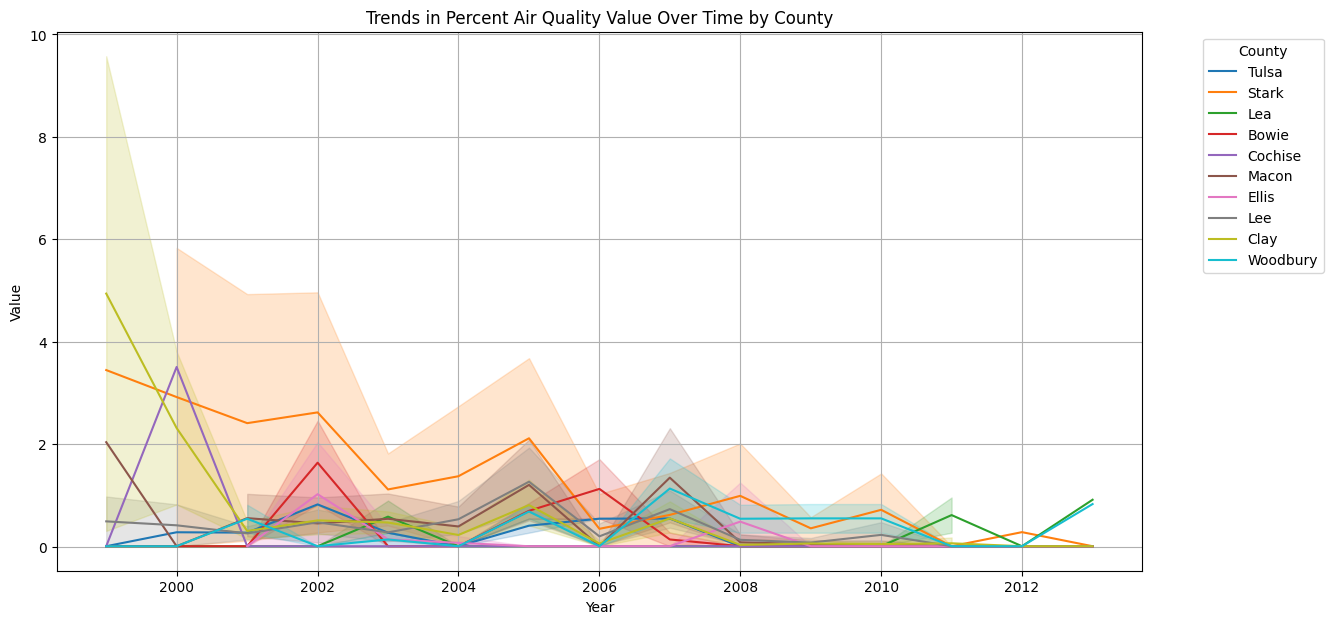

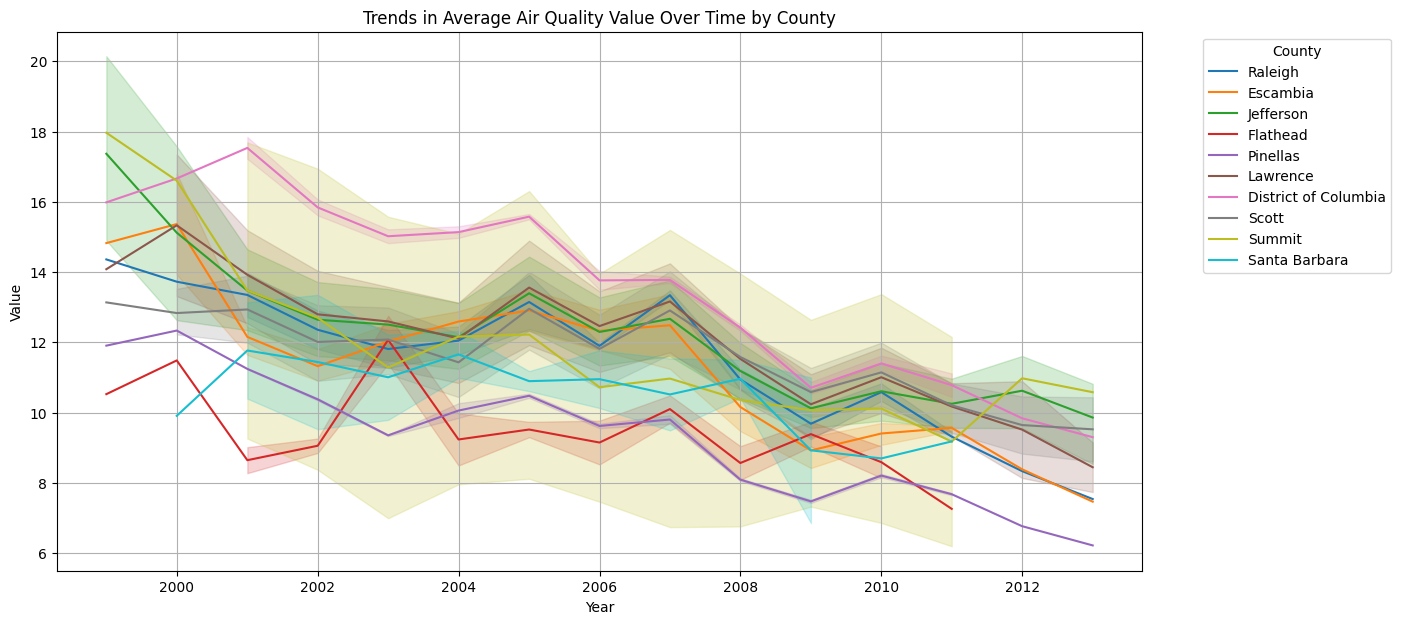

In [15]:
for measure_type, data in segmented_data.items():
    # Filter for a few selected counties to keep the plot readable
    selected_counties = data['CountyName'].unique()[:10]  # Adjust the number as needed
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='ReportYear', y='Value', hue='CountyName', data=data[data['CountyName'].isin(selected_counties)])
    plt.title(f'Trends in {measure_type} Air Quality Value Over Time by County')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


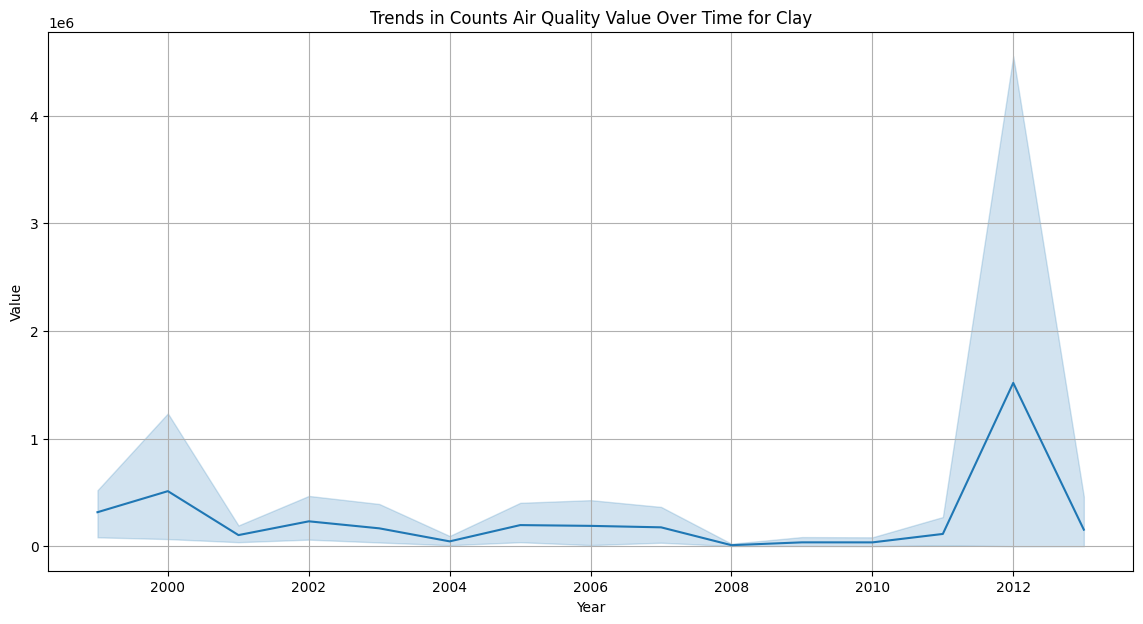

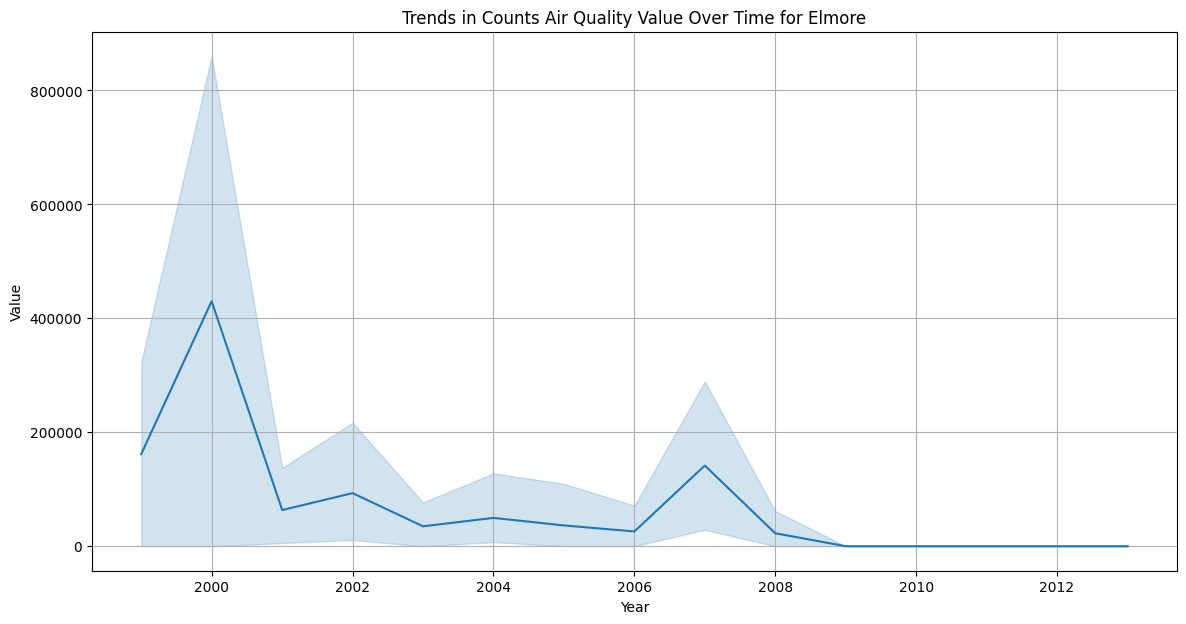

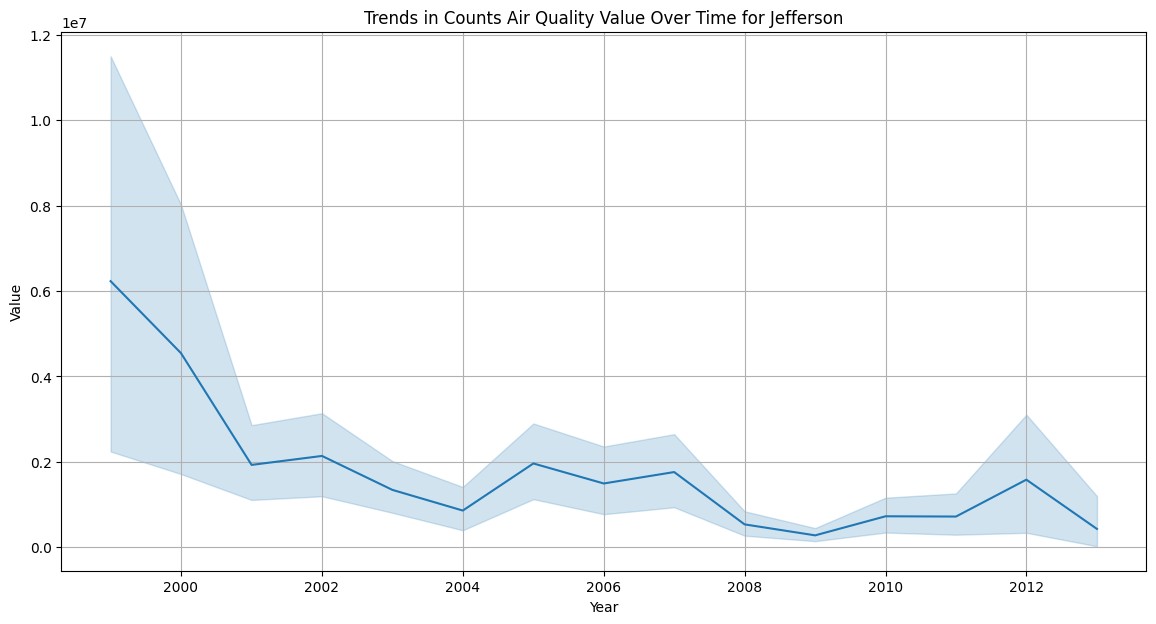

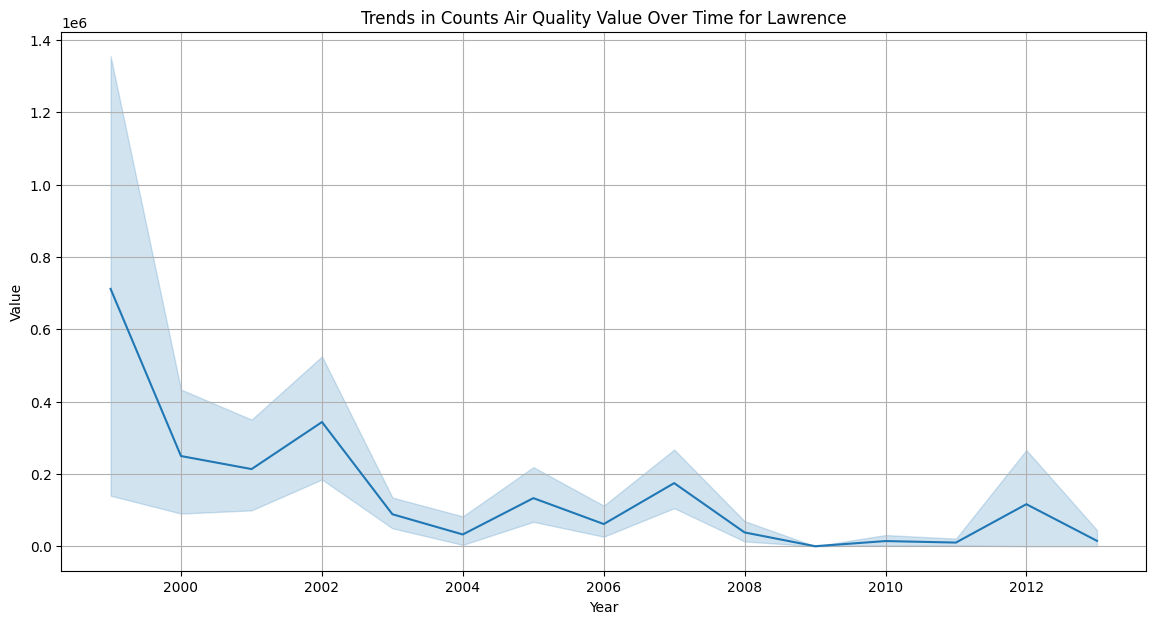

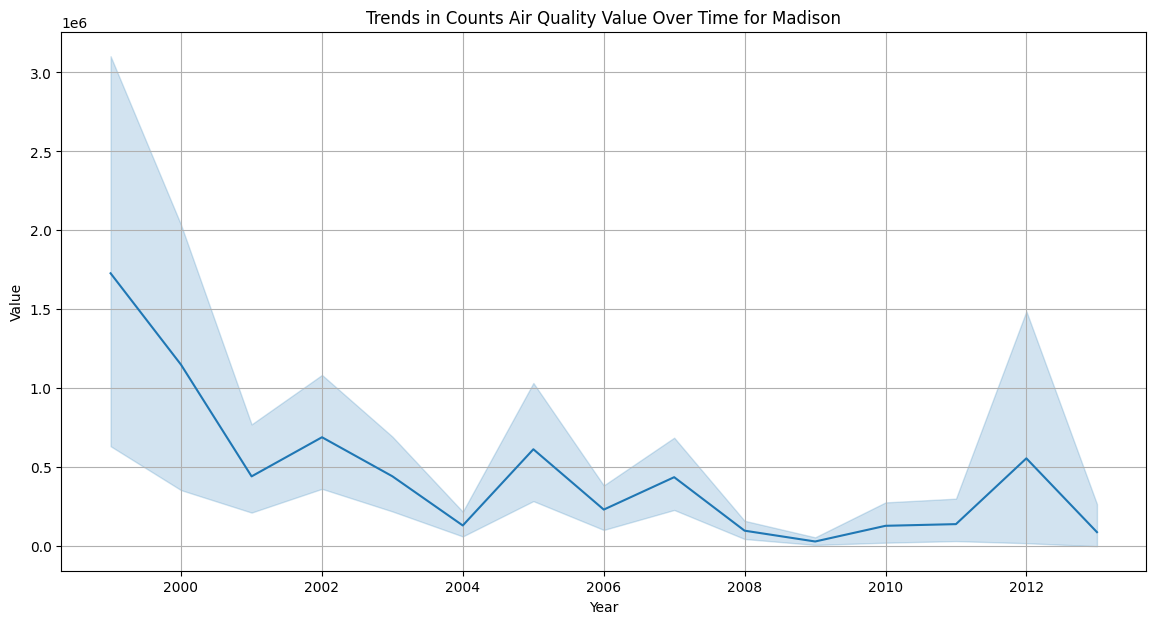

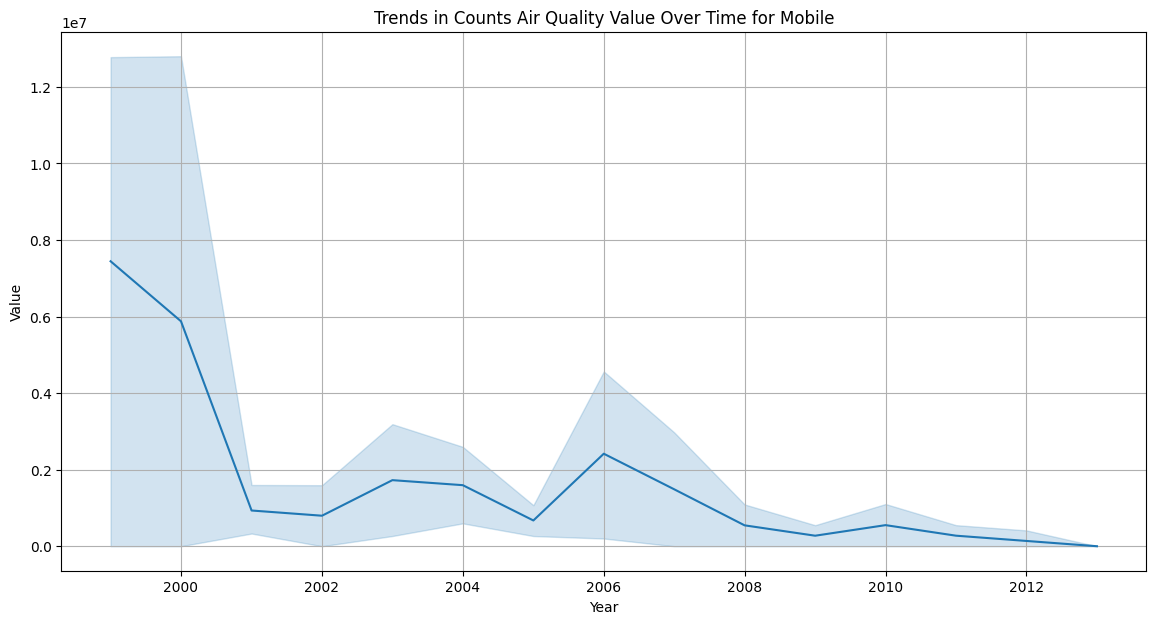

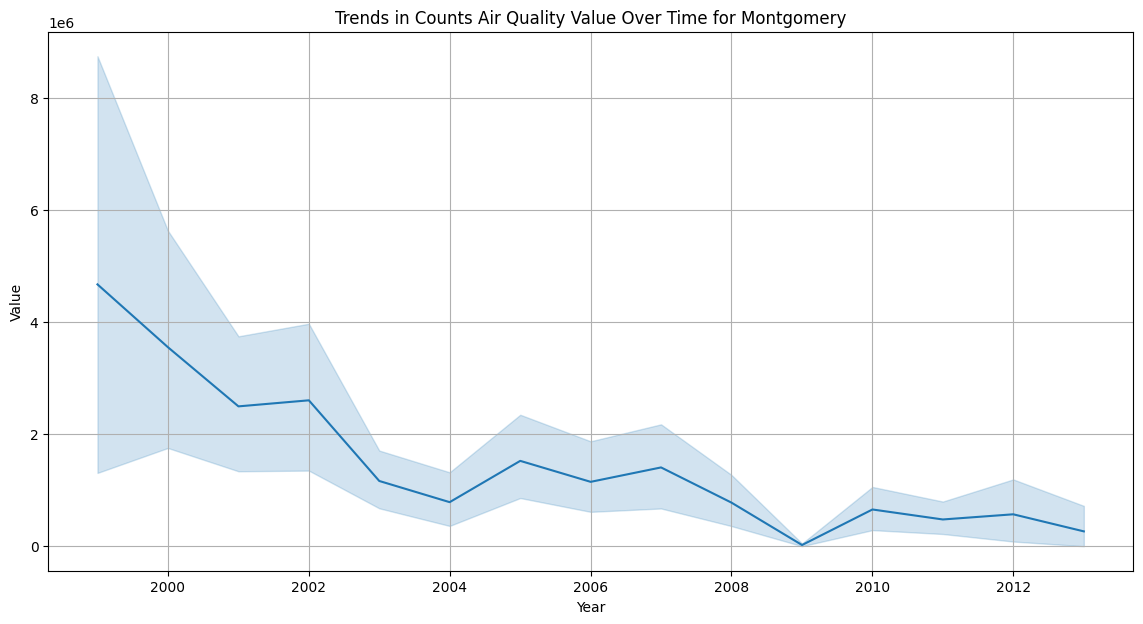

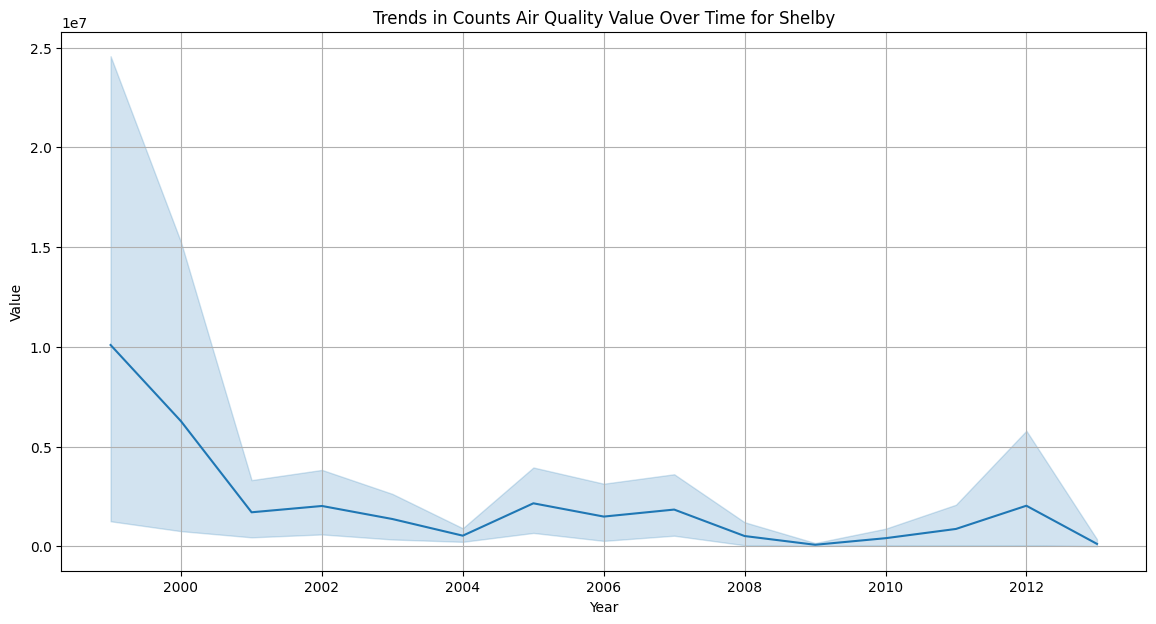

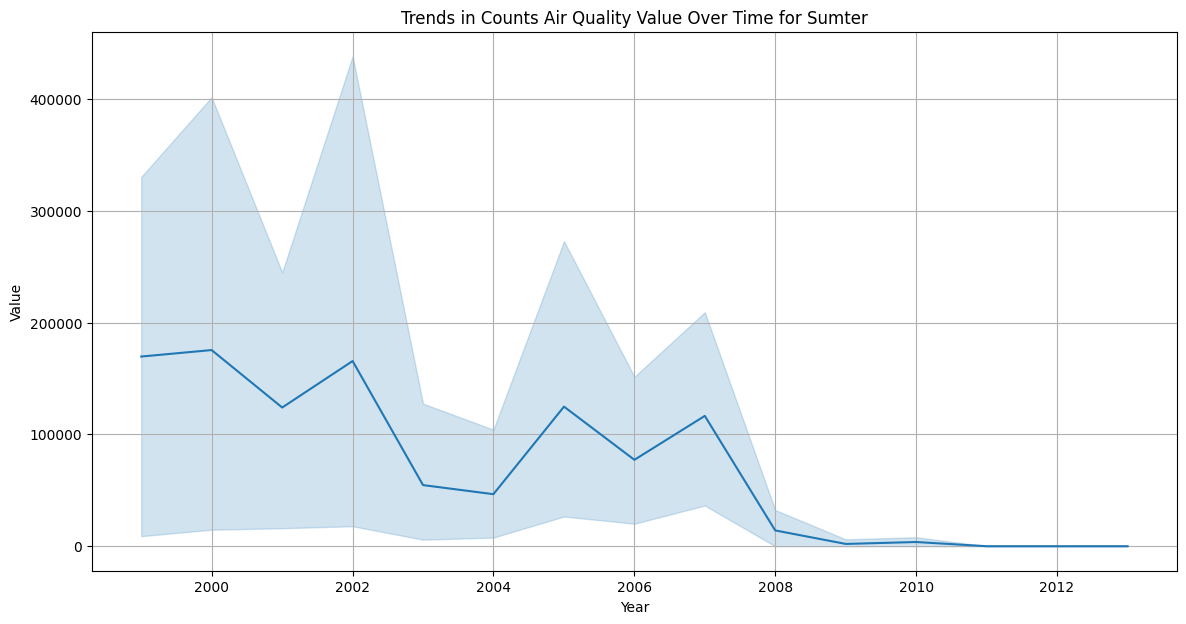

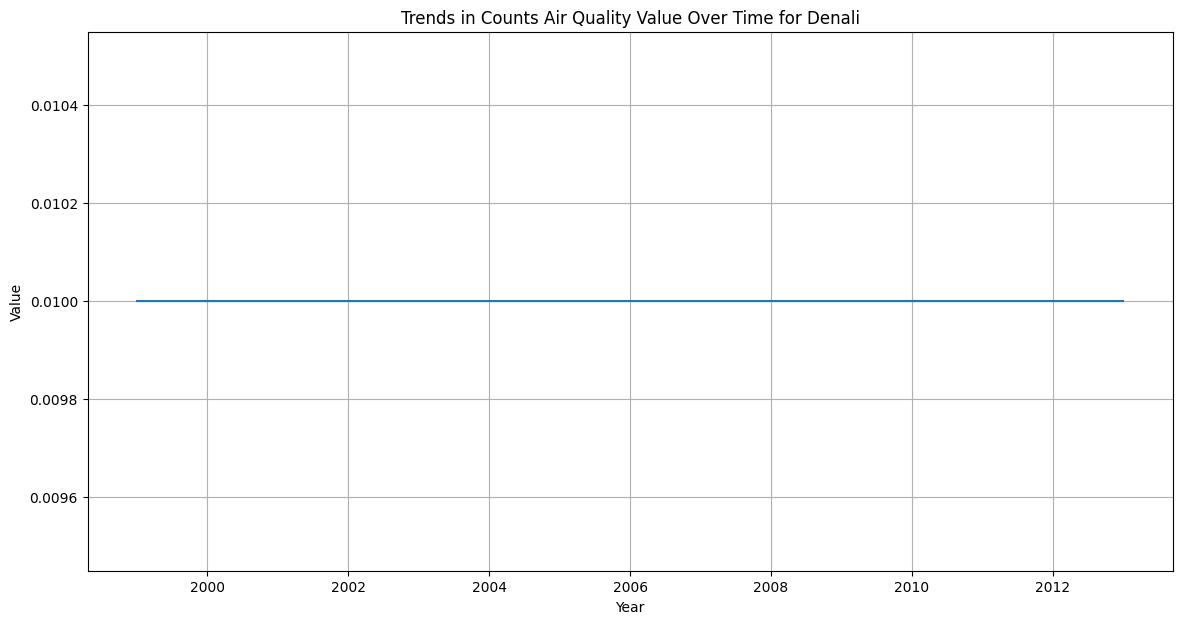

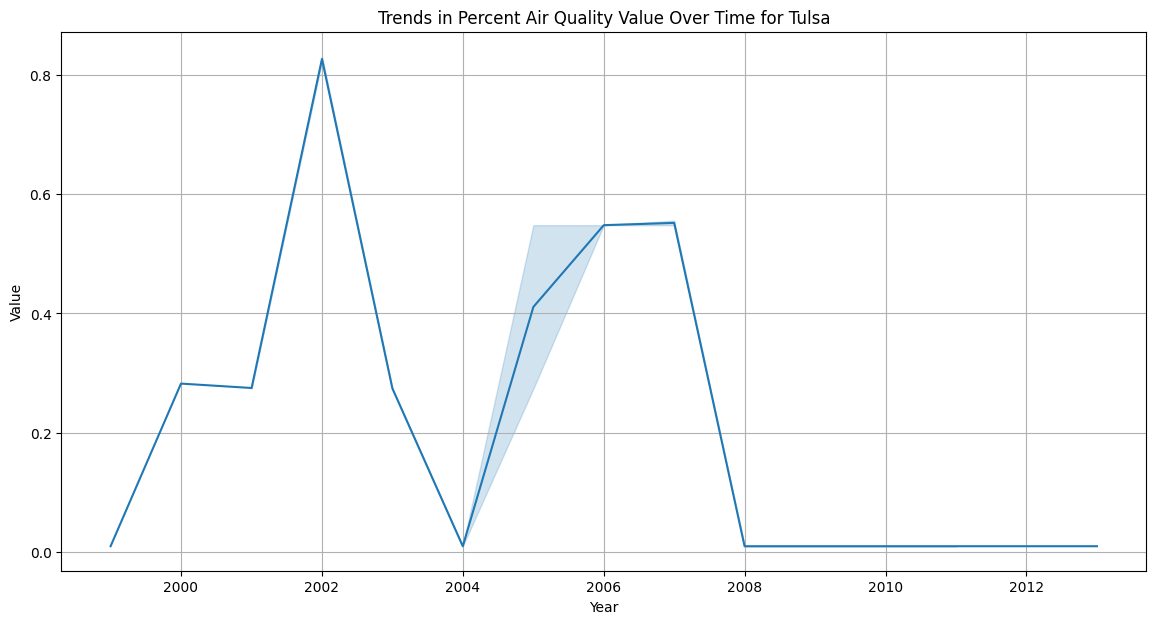

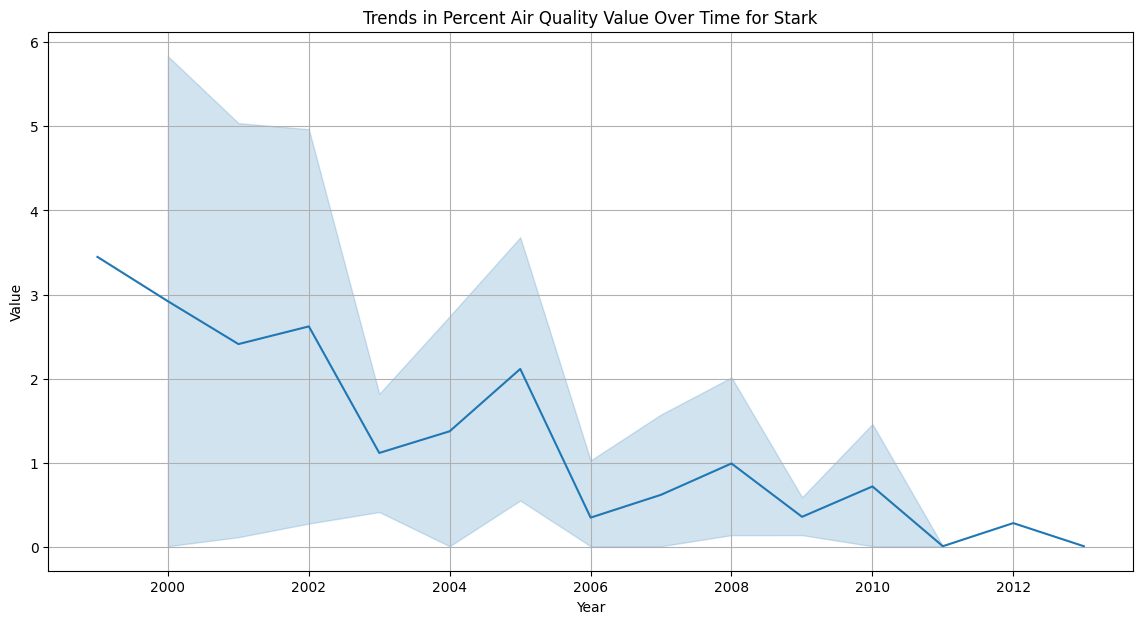

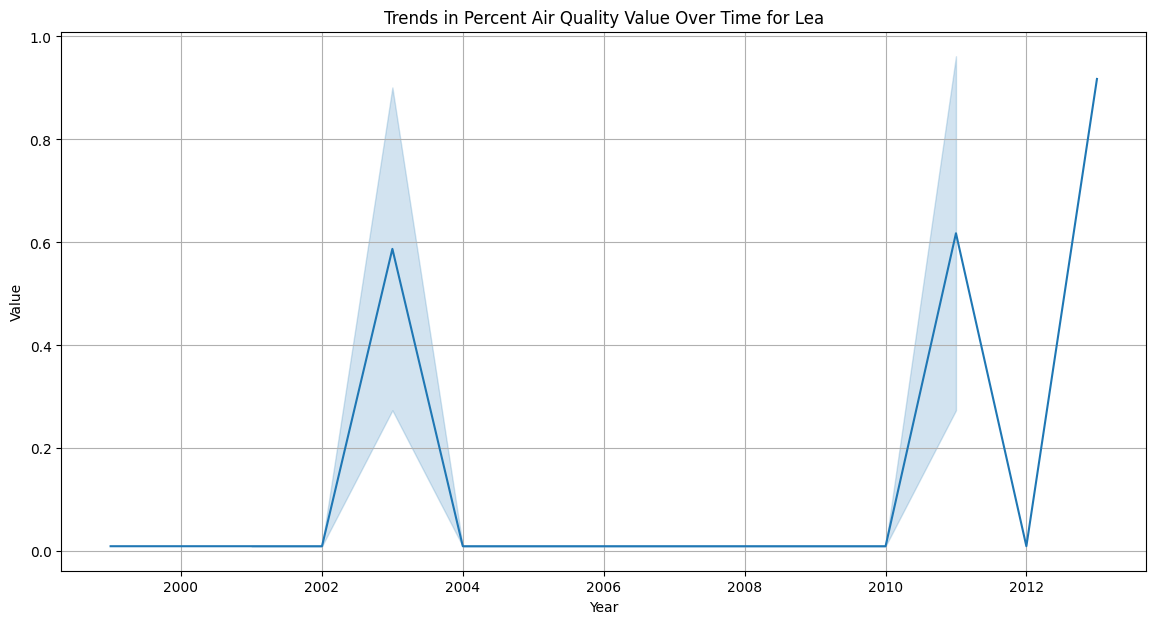

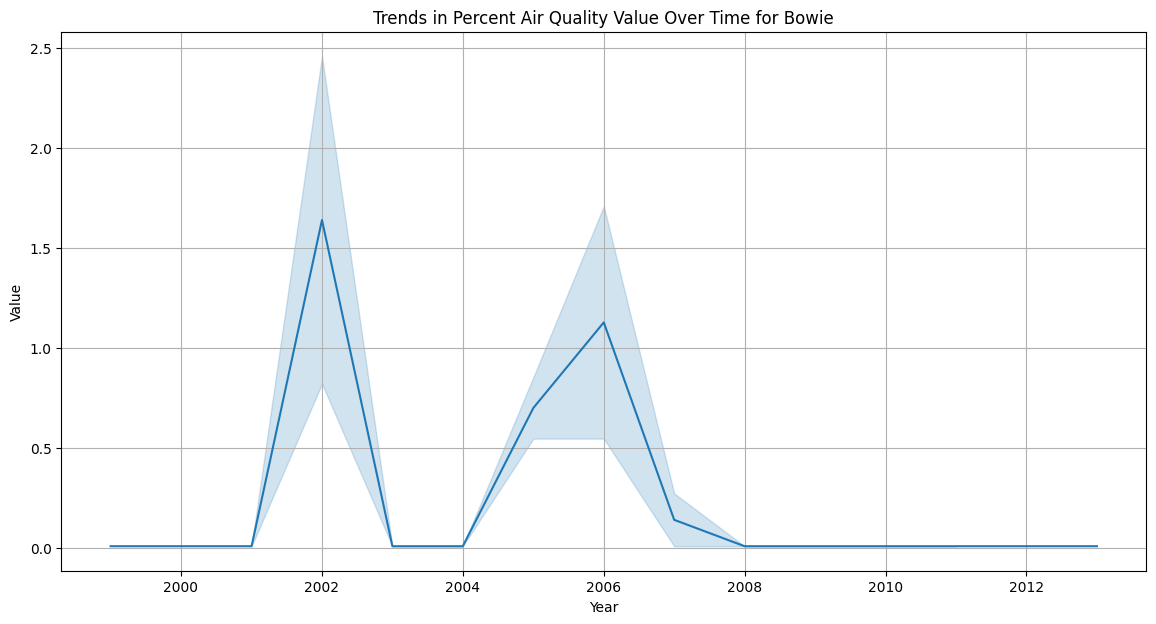

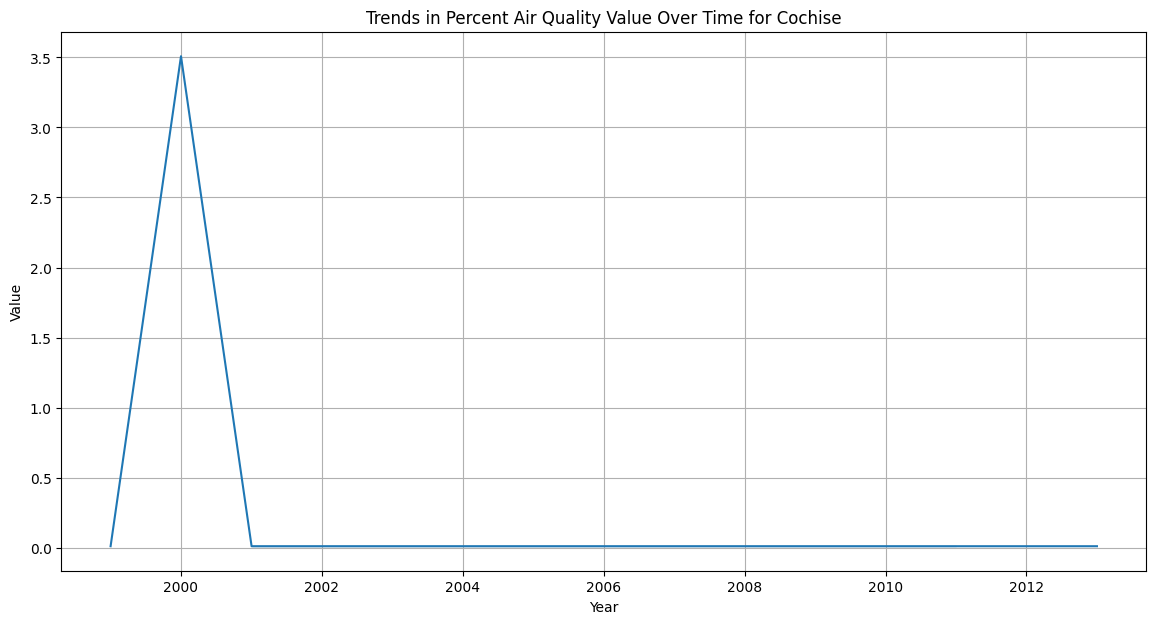

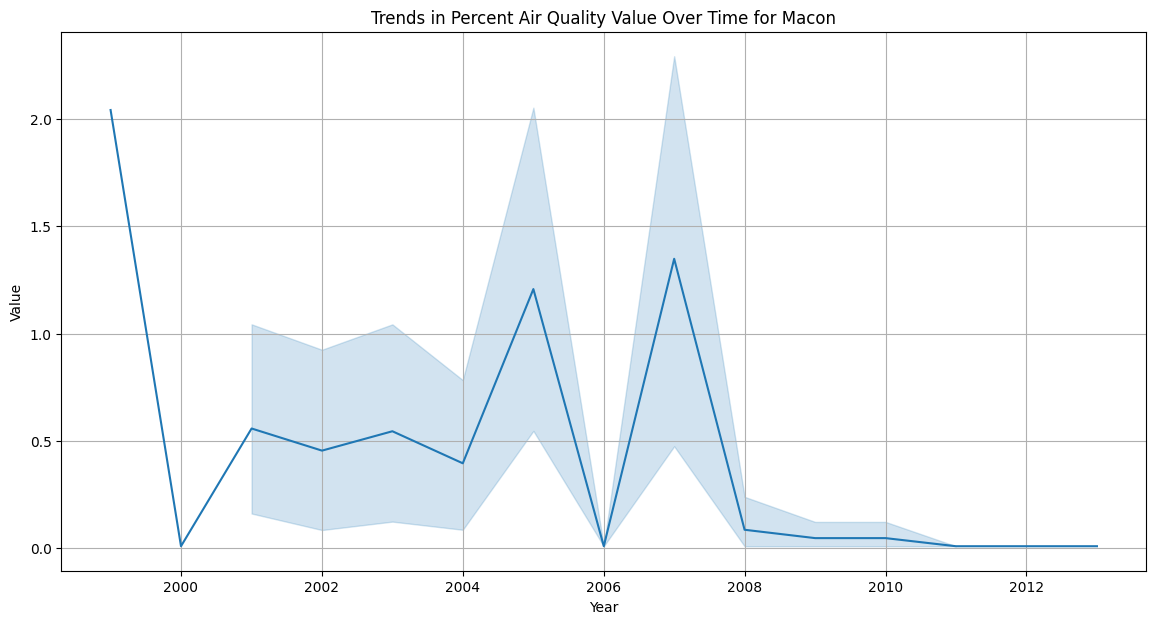

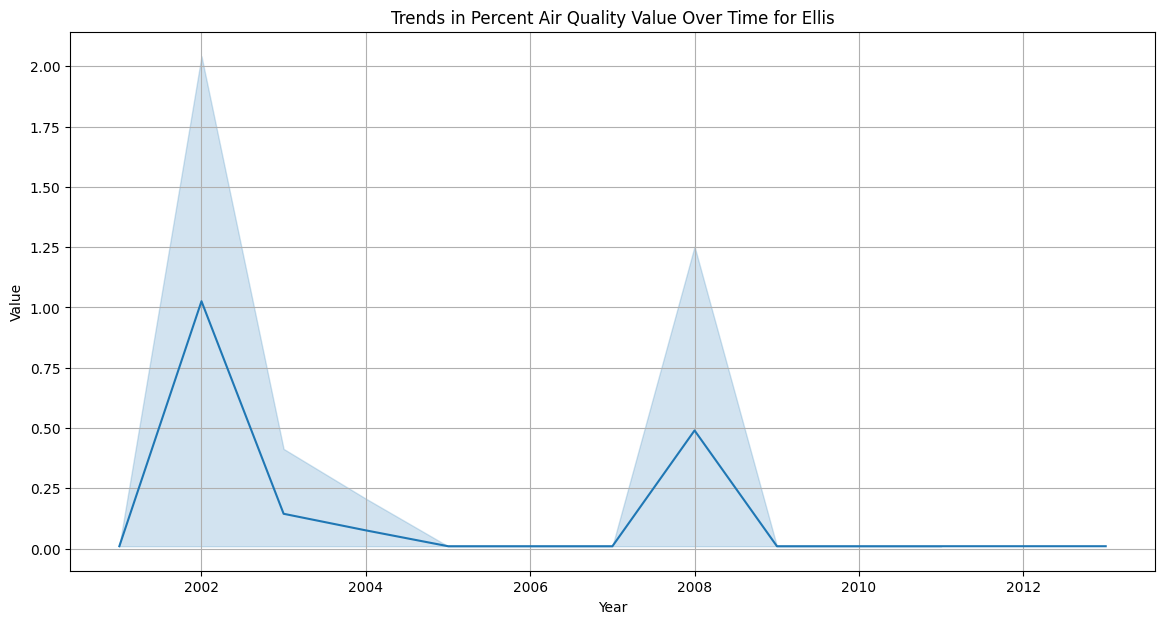

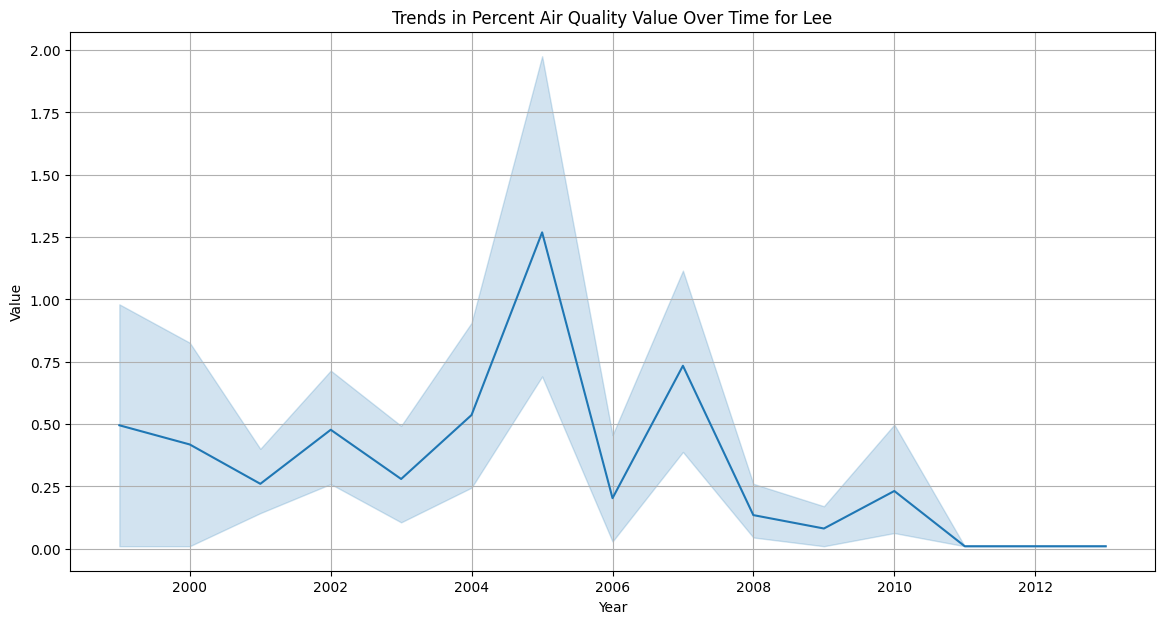

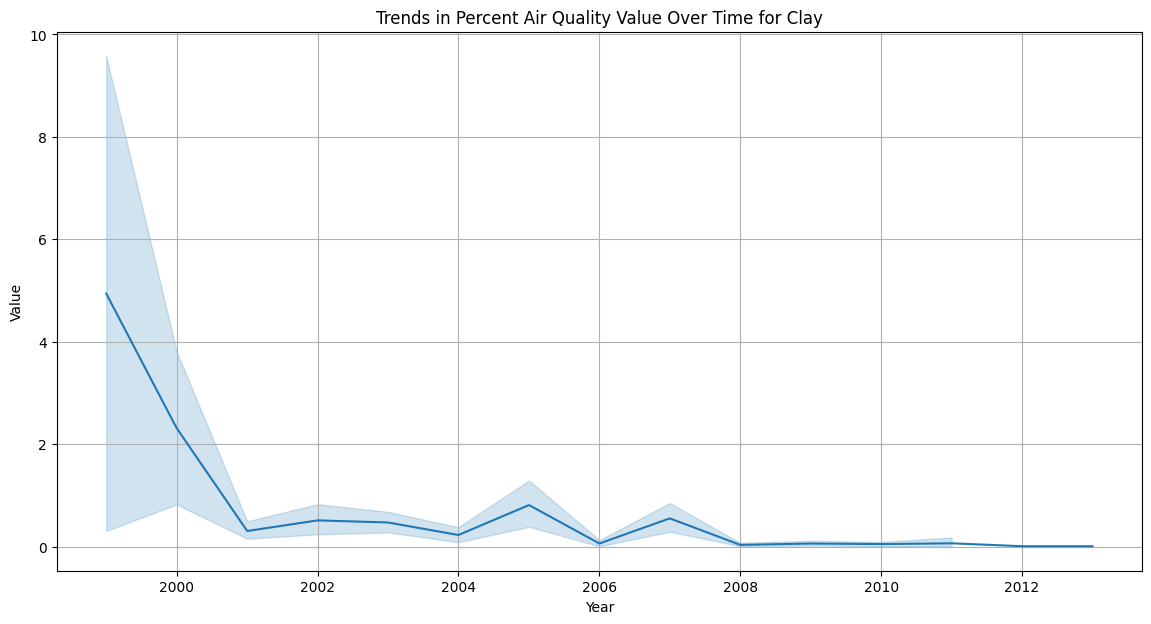

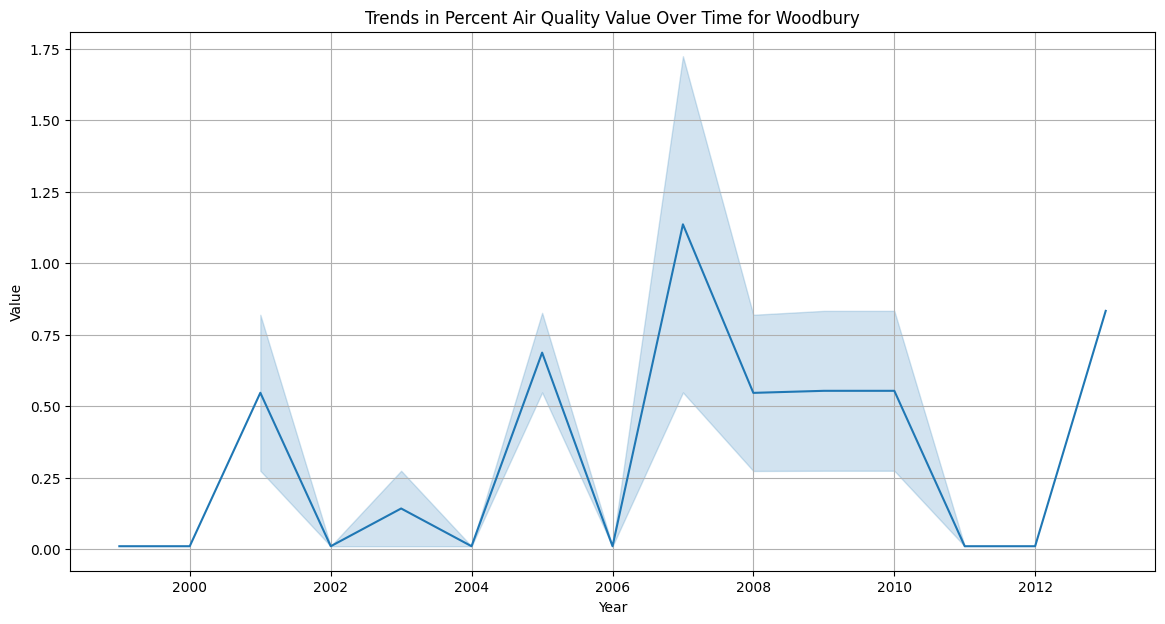

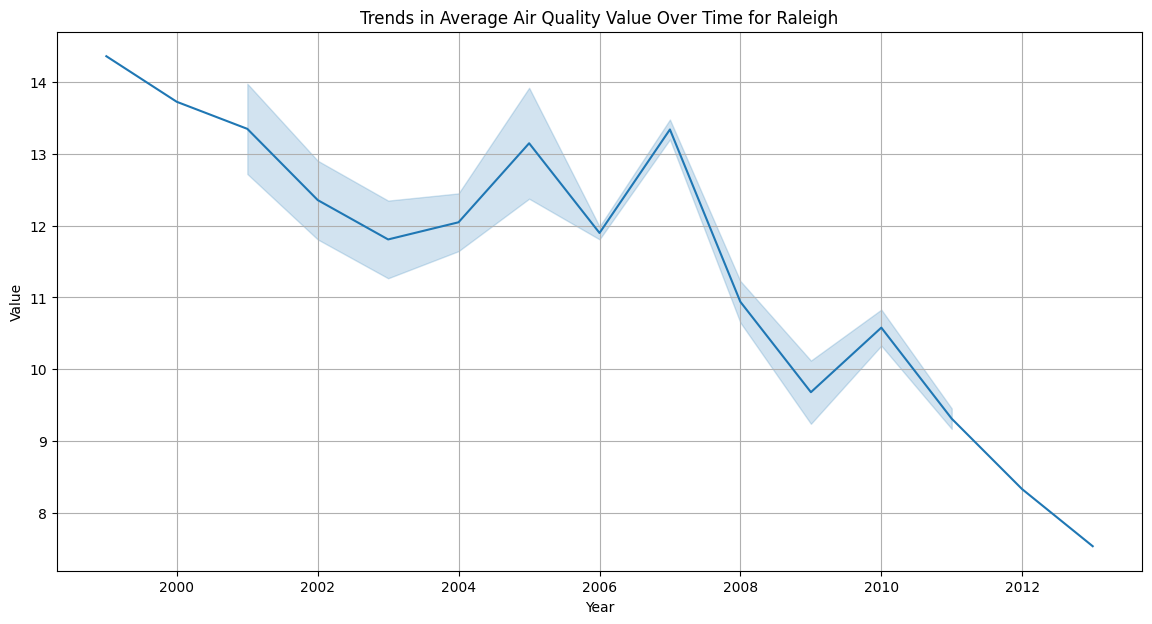

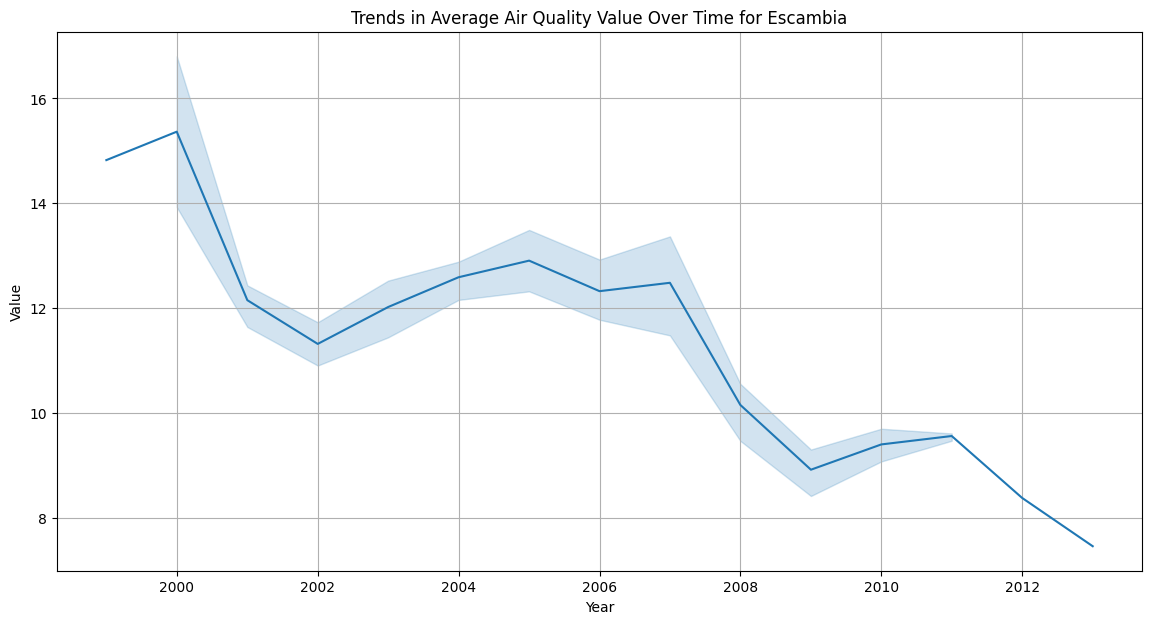

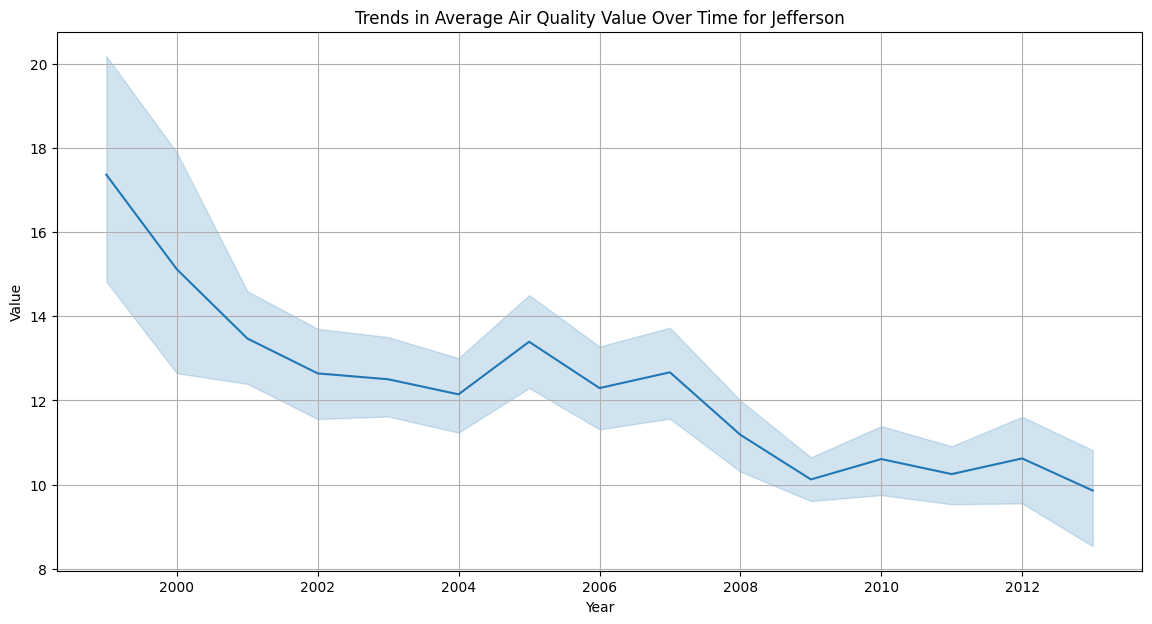

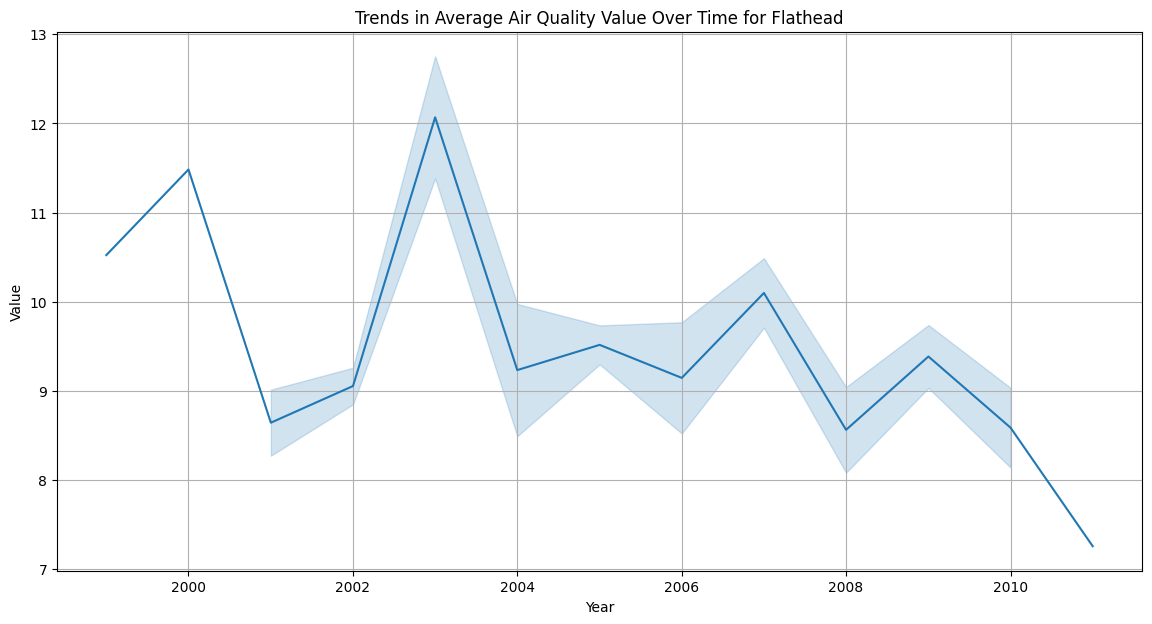

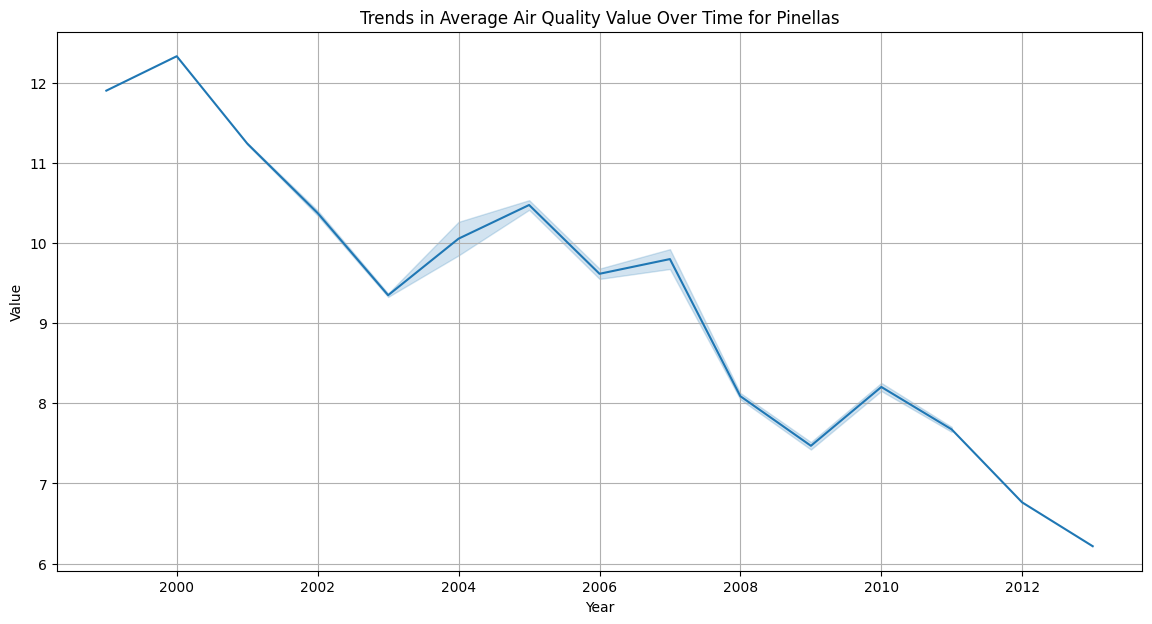

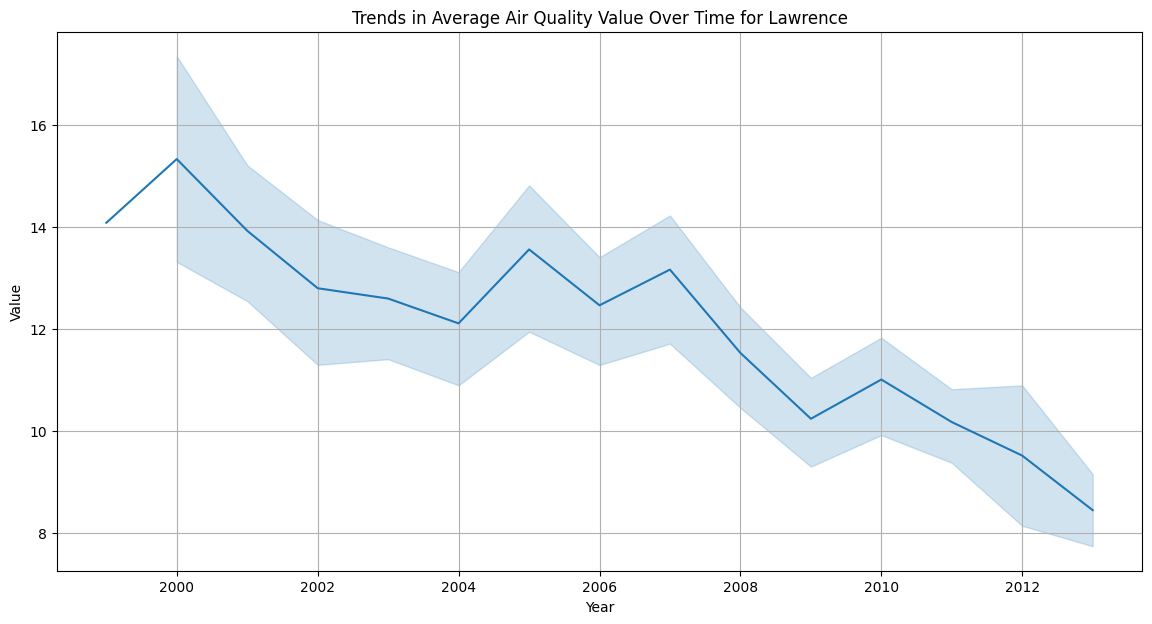

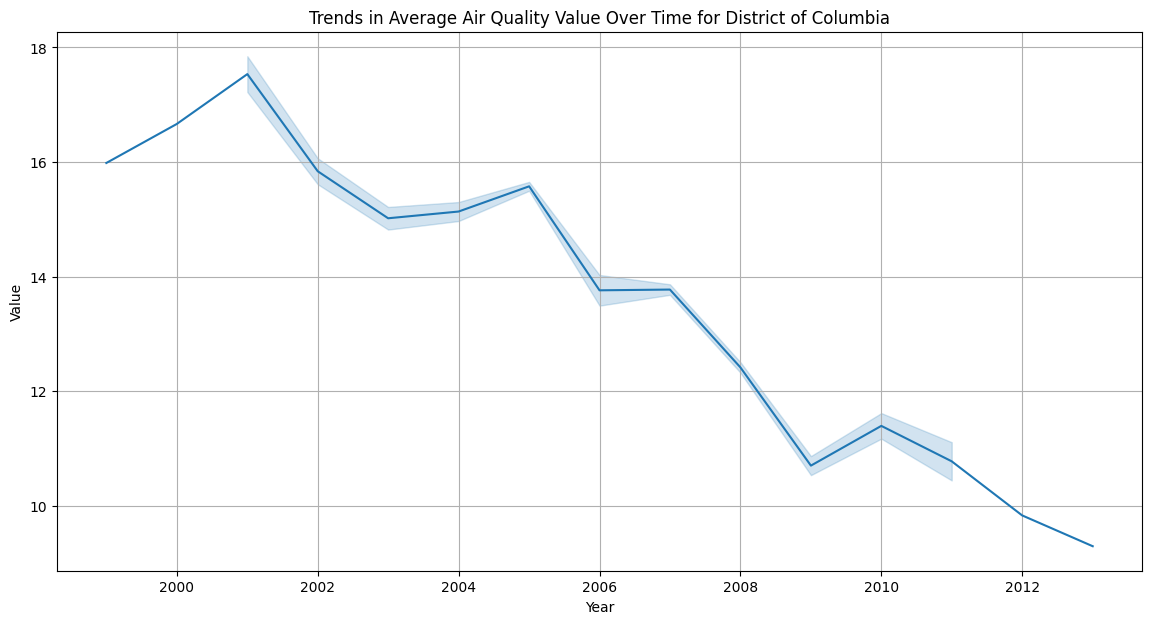

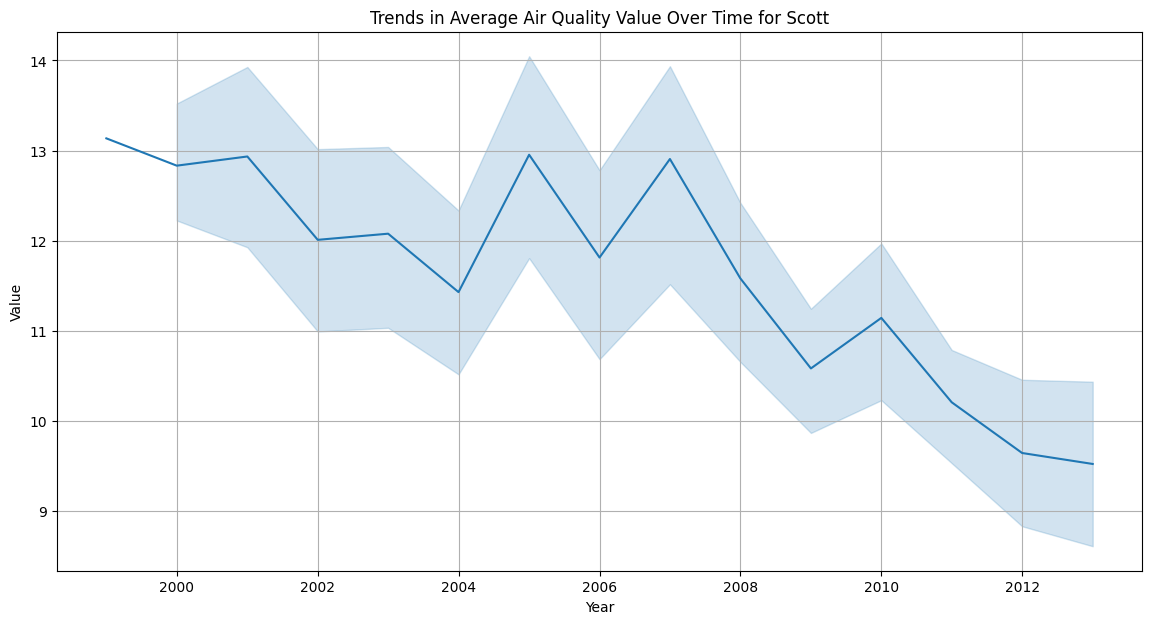

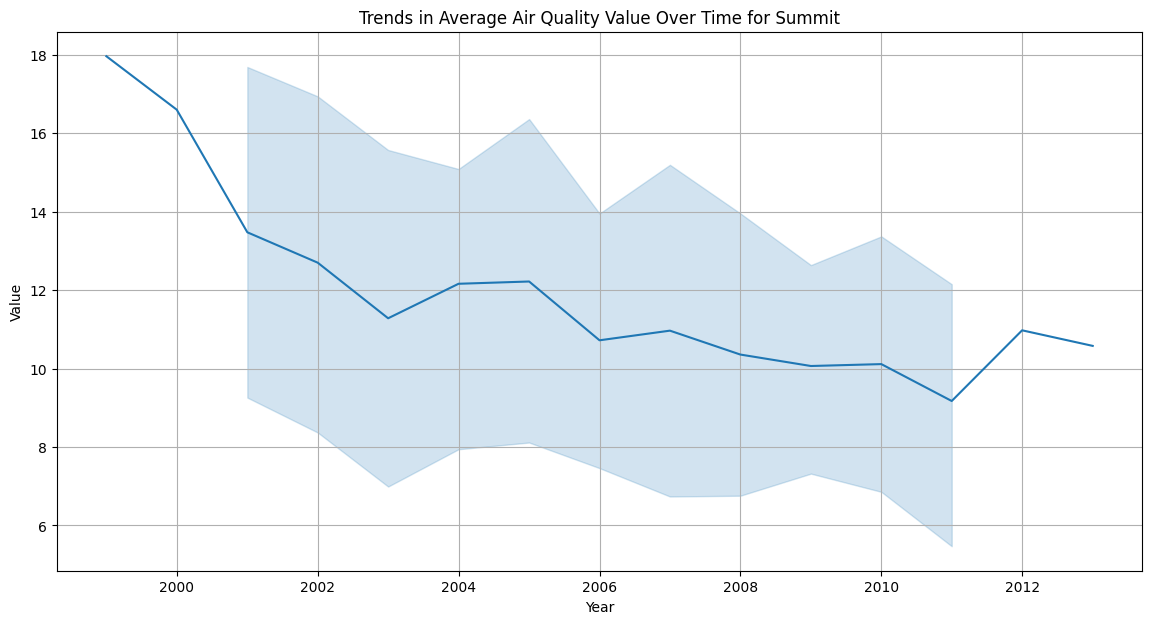

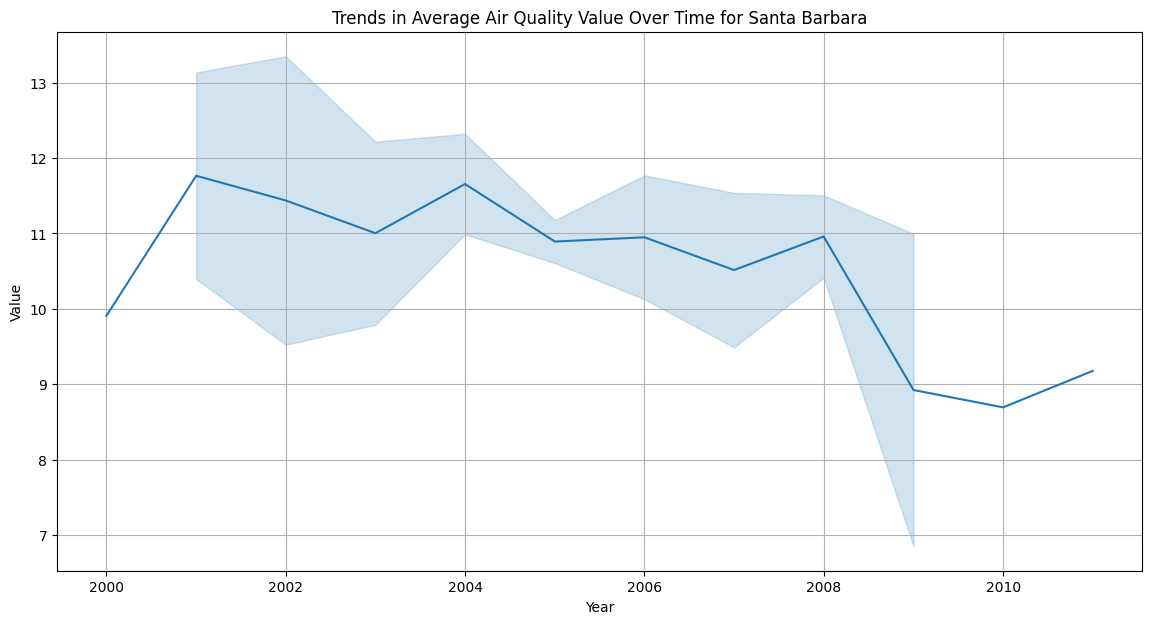

In [16]:
for measure_type, data in segmented_data.items():
    # Filter for a few selected counties to keep the plot readable
    selected_counties = data['CountyName'].unique()[:10]  # Adjust the number as needed

    for county in selected_counties:
        county_data = data[data['CountyName'] == county]
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='ReportYear', y='Value', data=county_data)
        plt.title(f'Trends in {measure_type} Air Quality Value Over Time for {county}')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()


In [17]:
# Reset index to make ReportYear a column
data.reset_index(inplace=True)

# Describe the 'ReportYear' and 'Value' columns
print("Description of 'ReportYear' and 'Value' columns:")
print(data[['ReportYear', 'Value']].describe())


Description of 'ReportYear' and 'Value' columns:
                          ReportYear         Value
count                          42621  42621.000000
mean   2005-12-21 12:21:32.320686976     10.757232
min              1999-01-01 00:00:00      1.635714
25%              2003-01-01 00:00:00      8.818791
50%              2006-01-01 00:00:00     10.725448
75%              2009-01-01 00:00:00     12.561596
max              2013-01-01 00:00:00     51.201583
std                              NaN      2.719247


In [18]:
# Check for unique values in the 'ReportYear' column
unique_years = data['ReportYear'].nunique()
unique_years_values = data['ReportYear'].unique()

print(f"Number of unique years: {unique_years}")
print("Unique years:", unique_years_values)


Number of unique years: 15
Unique years: <DatetimeArray>
['2003-01-01 00:00:00', '2002-01-01 00:00:00', '1999-01-01 00:00:00',
 '2001-01-01 00:00:00', '2006-01-01 00:00:00', '2009-01-01 00:00:00',
 '2013-01-01 00:00:00', '2004-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2010-01-01 00:00:00', '2005-01-01 00:00:00',
 '2000-01-01 00:00:00', '2012-01-01 00:00:00', '2011-01-01 00:00:00']
Length: 15, dtype: datetime64[ns]


Number of unique years: 15
Unique years: [2003 2002 1999 2001 2006 2009 2013 2004 2007 2008 2010 2005 2000 2012
 2011]
Length of the data: 42621
                Value
ReportYear           
1999-12-31  14.829298
2000-12-31  14.815712
2001-12-31  12.159263
2002-12-31  11.417848
2003-12-31  11.615909
2004-12-31  11.183236
2005-12-31  12.145387
2006-12-31  11.304164
2007-12-31  12.074525
2008-12-31  10.640640
2009-12-31   9.627117
2010-12-31  10.267475
2011-12-31   9.779263
2012-12-31   8.905400
2013-12-31   8.020774


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


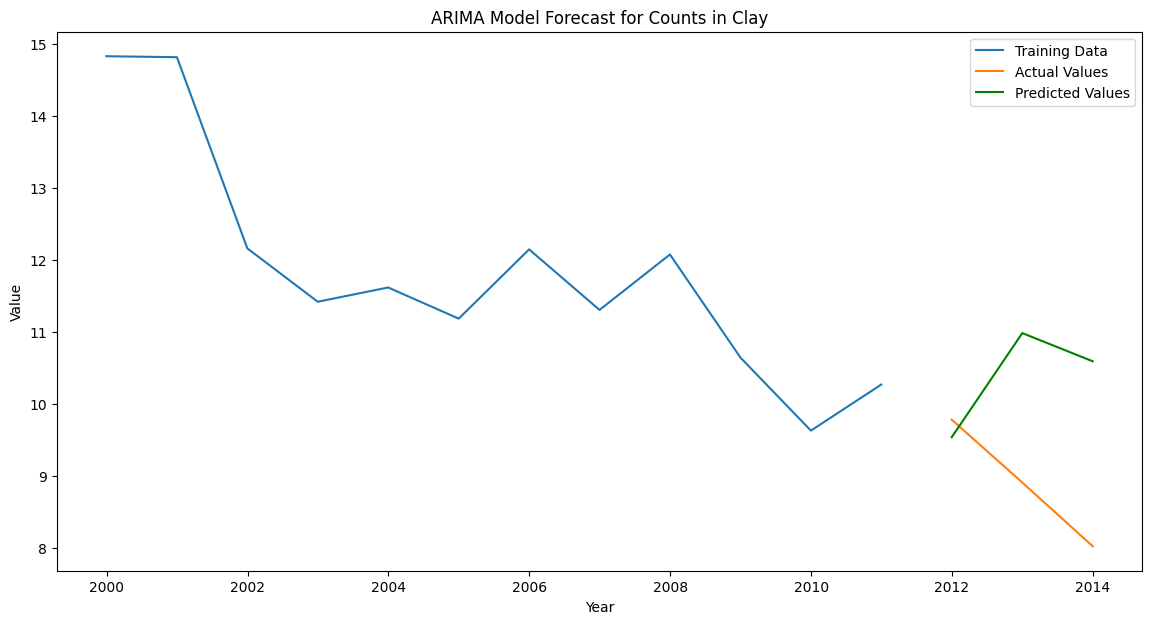

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the data (assuming 'data' is your DataFrame)
# Ensure 'ReportYear' is correctly parsed from the index or a specific column

# If 'ReportYear' is already in the index, ensure it's correctly parsed
if 'ReportYear' not in data.columns:
    data['ReportYear'] = pd.to_datetime(data.index)

# Reset the index to make 'ReportYear' a column
data.reset_index(drop=True, inplace=True)

# Check for unique values in the 'ReportYear' column
unique_years = data['ReportYear'].dt.year.nunique()
unique_years_values = data['ReportYear'].dt.year.unique()

print(f"Number of unique years: {unique_years}")
print("Unique years:", unique_years_values)

# Filter data starting from 1999
data = data[data['ReportYear'].dt.year >= 1999]

# Set 'ReportYear' as the index for the data
data.set_index('ReportYear', inplace=True)

# Check the length of the data
print(f"Length of the data: {len(data)}")

# Example usage with one county (e.g., Clay)
county_name = 'Clay'
county_data = data[data['CountyName'] == county_name]

# No need to set 'ReportYear' as index again, it is already set

# Isolate the 'Value' column for resampling and interpolation
value_data = county_data[['Value']]

# Resample the data to fill missing years and interpolate missing values
value_data = value_data.resample('A').mean()  # Using annual frequency
value_data['Value'].interpolate(method='linear', inplace=True)

# Print the updated data to ensure there are no duplicate years
print(value_data.head(20))  # Show the first 20 rows for verification

# Define the function to evaluate ARIMA model and plot the results
def evaluate_arima_model(train, test, county_name, measure_type):
    try:
        model = ARIMA(train, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))

        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train, label='Training Data')
        plt.plot(test, label='Actual Values')
        plt.plot(forecast, label='Predicted Values', color='green')
        plt.title(f'ARIMA Model Forecast for {measure_type} in {county_name}')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Splitting data into training and test sets
train_size = int(len(value_data) * 0.8)
train_data, test_data = value_data[0:train_size], value_data[train_size:]

# Evaluate and plot the ARIMA model
evaluate_arima_model(train_data, test_data, county_name, 'Counts')

Number of unique years: 15
Unique years: [2003 2002 1999 2001 2006 2009 2013 2004 2007 2008 2010 2005 2000 2012
 2011]
Length of the data: 42621

Processing data for county: Raleigh
                Value
ReportYear           
1999-12-31  14.359485
2000-12-31  13.725000
2001-12-31  13.348040
2002-12-31  12.356320
2003-12-31  11.808398
2004-12-31  12.047306
2005-12-31  13.147671
2006-12-31  11.898674
2007-12-31  13.339574
2008-12-31  10.941000
2009-12-31   9.681578
2010-12-31  10.580408
2011-12-31   9.312764
2012-12-31   8.331771
2013-12-31   7.536808


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


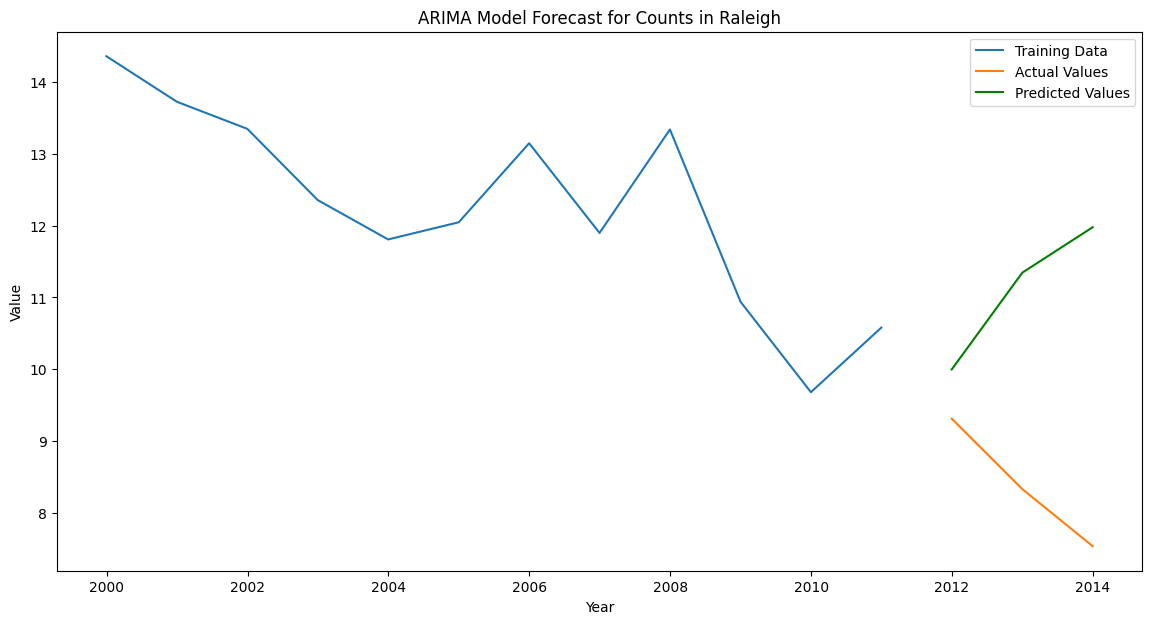


Processing data for county: Escambia
                Value
ReportYear           
1999-12-31  14.823849
2000-12-31  15.365987
2001-12-31  12.153167
2002-12-31  11.319587
2003-12-31  12.022495
2004-12-31  12.590457
2005-12-31  12.907179
2006-12-31  12.325159
2007-12-31  12.484796
2008-12-31  10.156400
2009-12-31   8.920969
2010-12-31   9.403081
2011-12-31   9.563273
2012-12-31   8.383118
2013-12-31   7.462004


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


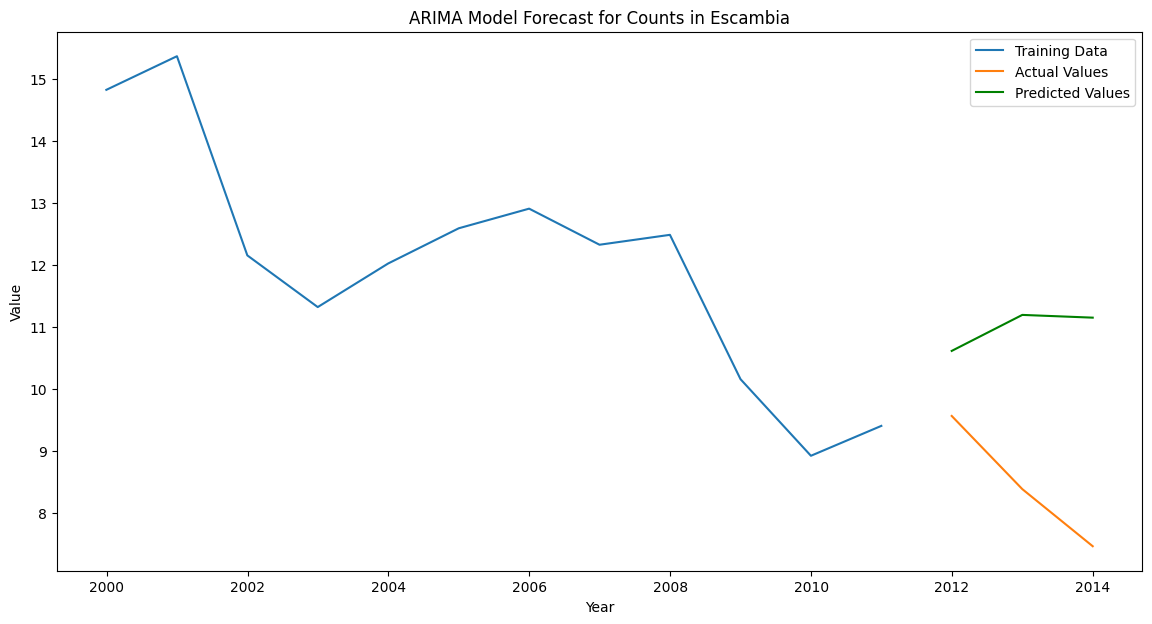


Processing data for county: Jefferson
                Value
ReportYear           
1999-12-31  17.367871
2000-12-31  15.120782
2001-12-31  13.472919
2002-12-31  12.642659
2003-12-31  12.503318
2004-12-31  12.144680
2005-12-31  13.394939
2006-12-31  12.293823
2007-12-31  12.668505
2008-12-31  11.183614
2009-12-31  10.121223
2010-12-31  10.605563
2011-12-31  10.248363
2012-12-31  10.620970
2013-12-31   9.856985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


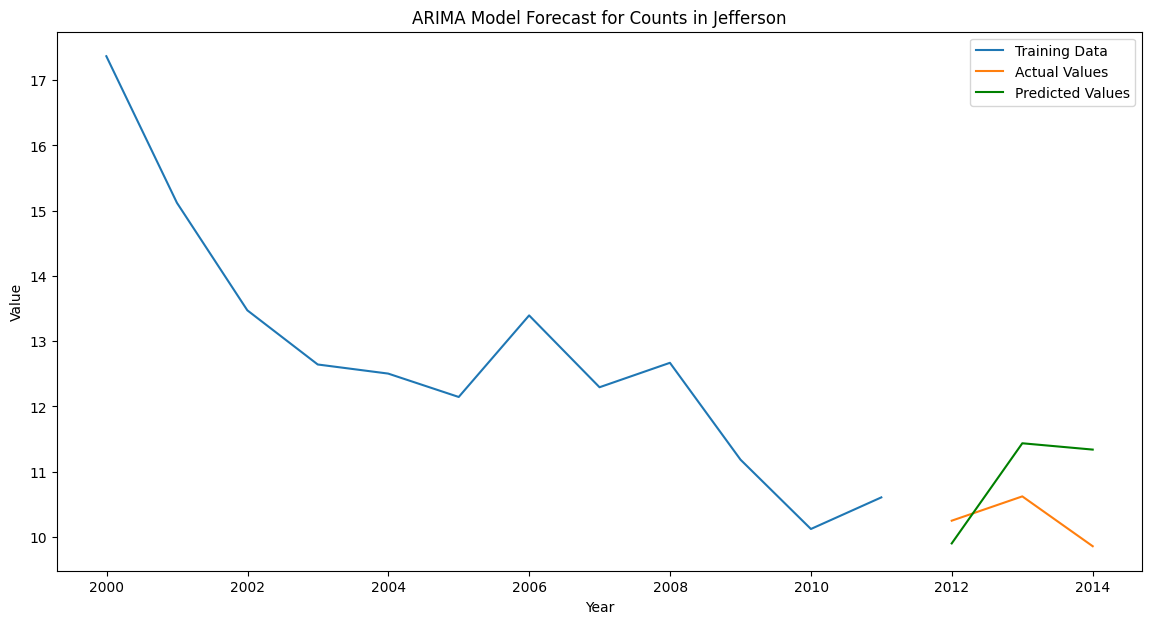


Processing data for county: Flathead
                Value
ReportYear           
1999-12-31  10.523349
2000-12-31  11.483551
2001-12-31   8.643123
2002-12-31   9.054387
2003-12-31  12.069156
2004-12-31   9.233229
2005-12-31   9.516291
2006-12-31   9.145758
2007-12-31  10.098469
2008-12-31   8.562900
2009-12-31   9.385637
2010-12-31   8.587029
2011-12-31   7.257303


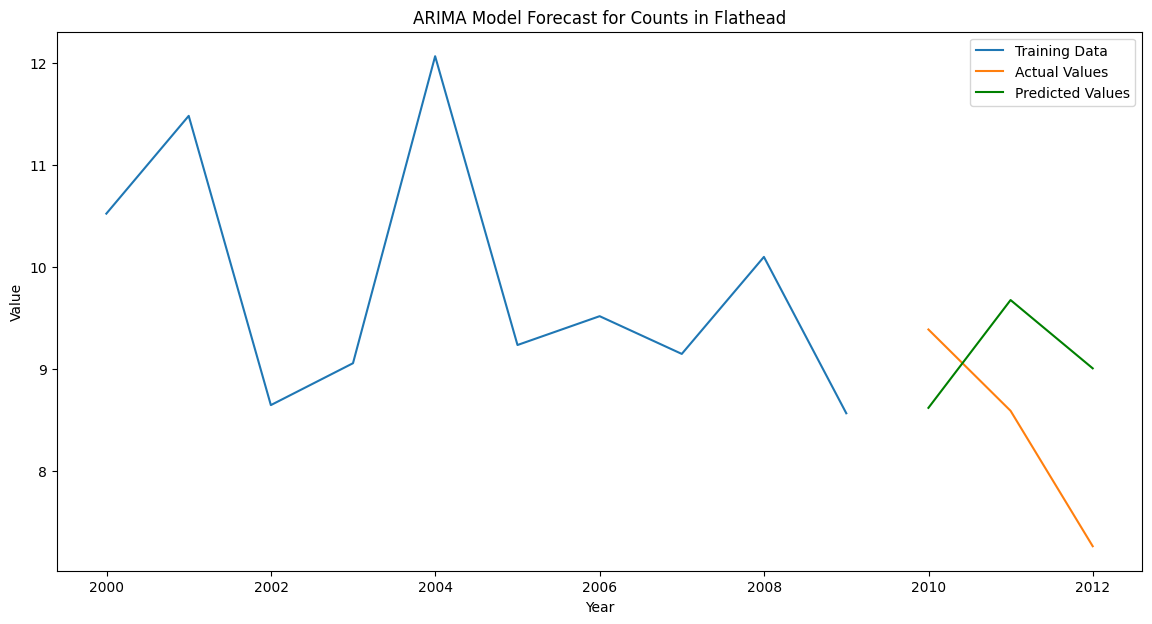


Processing data for county: Pinellas
                Value
ReportYear           
1999-12-31  11.904473
2000-12-31  12.334028
2001-12-31  11.242229
2002-12-31  10.374833
2003-12-31   9.350376
2004-12-31  10.056199
2005-12-31  10.476527
2006-12-31   9.617767
2007-12-31   9.801428
2008-12-31   8.089601
2009-12-31   7.470170
2010-12-31   8.204814
2011-12-31   7.674739
2012-12-31   6.764025
2013-12-31   6.216445


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


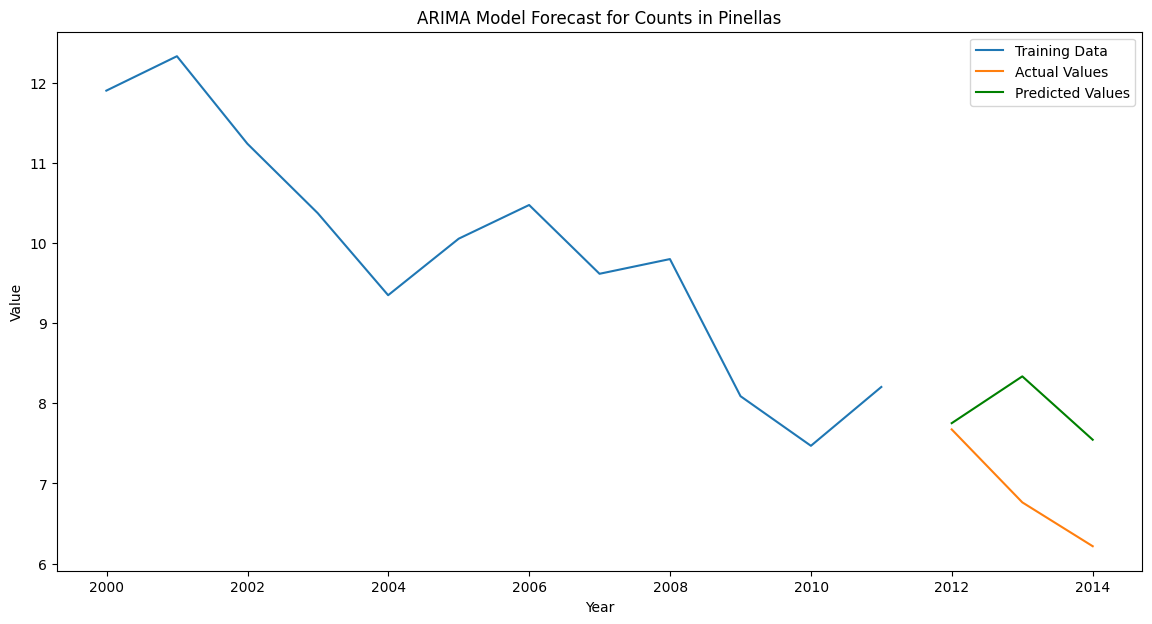


Processing data for county: Lawrence
                Value
ReportYear           
1999-12-31  14.080884
2000-12-31  15.330554
2001-12-31  13.922217
2002-12-31  12.796059
2003-12-31  12.593918
2004-12-31  12.106739
2005-12-31  13.557790
2006-12-31  12.461571
2007-12-31  13.161782
2008-12-31  11.528506
2009-12-31  10.235569
2010-12-31  11.005046
2011-12-31  10.171453
2012-12-31   9.513807
2013-12-31   8.442088


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


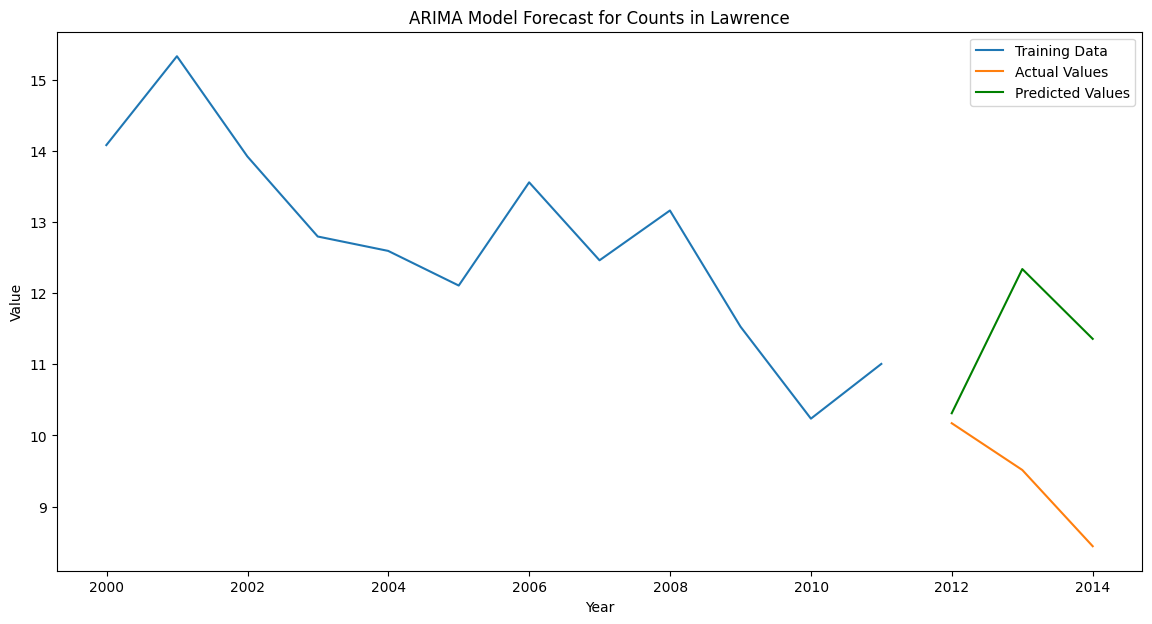


Processing data for county: District of Columbia
                Value
ReportYear           
1999-12-31  15.983992
2000-12-31  16.664016
2001-12-31  17.534328
2002-12-31  15.839462
2003-12-31  15.019302
2004-12-31  15.136693
2005-12-31  15.576530
2006-12-31  13.762394
2007-12-31  13.775518
2008-12-31  12.419278
2009-12-31  10.704142
2010-12-31  11.397299
2011-12-31  10.779121
2012-12-31   9.835930
2013-12-31   9.297966


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


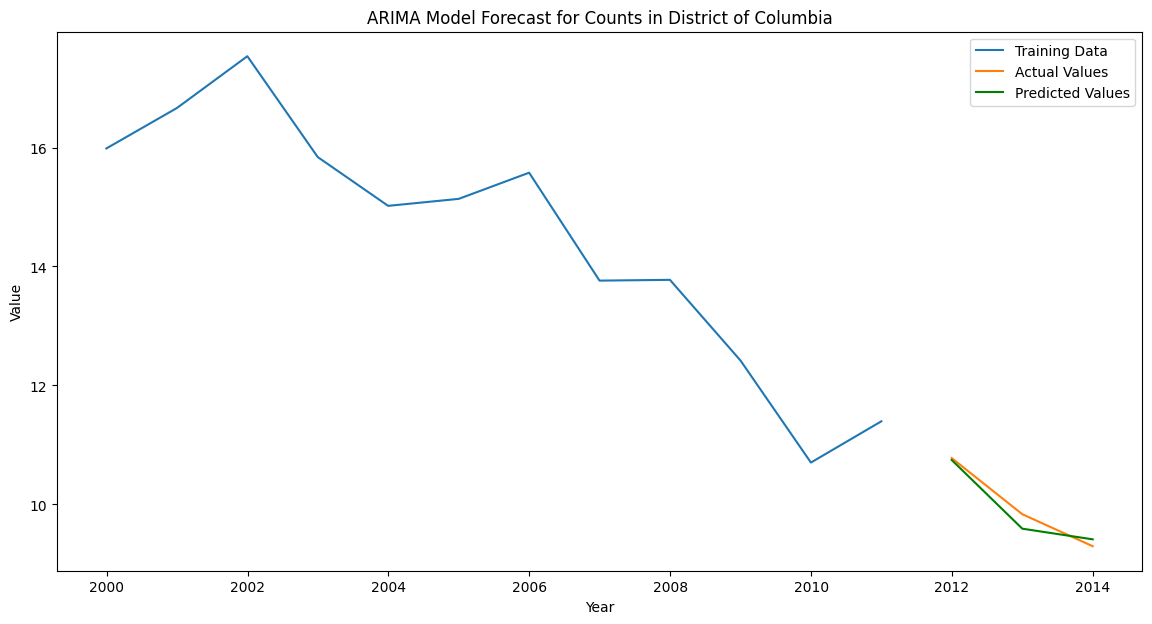


Processing data for county: Scott
                Value
ReportYear           
1999-12-31  13.135753
2000-12-31  12.832761
2001-12-31  12.934536
2002-12-31  12.009477
2003-12-31  12.077616
2004-12-31  11.429132
2005-12-31  12.953906
2006-12-31  11.813017
2007-12-31  12.906527
2008-12-31  11.581849
2009-12-31  10.582016
2010-12-31  11.142929
2011-12-31  10.206286
2012-12-31   9.643284
2013-12-31   9.521661


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


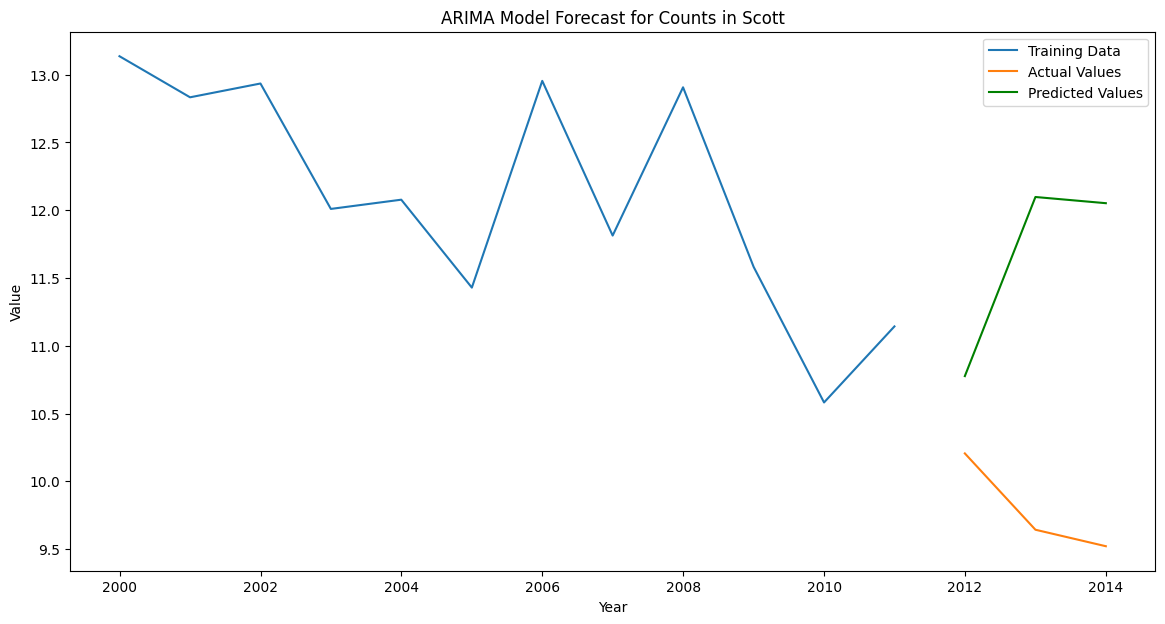


Processing data for county: Summit
                Value
ReportYear           
1999-12-31  17.966210
2000-12-31  16.602411
2001-12-31  13.475466
2002-12-31  12.700294
2003-12-31  11.282577
2004-12-31  12.162489
2005-12-31  12.220522
2006-12-31  10.720997
2007-12-31  10.966731
2008-12-31  10.357438
2009-12-31  10.065223
2010-12-31  10.113655
2011-12-31   9.172641
2012-12-31  10.975376
2013-12-31  10.578319


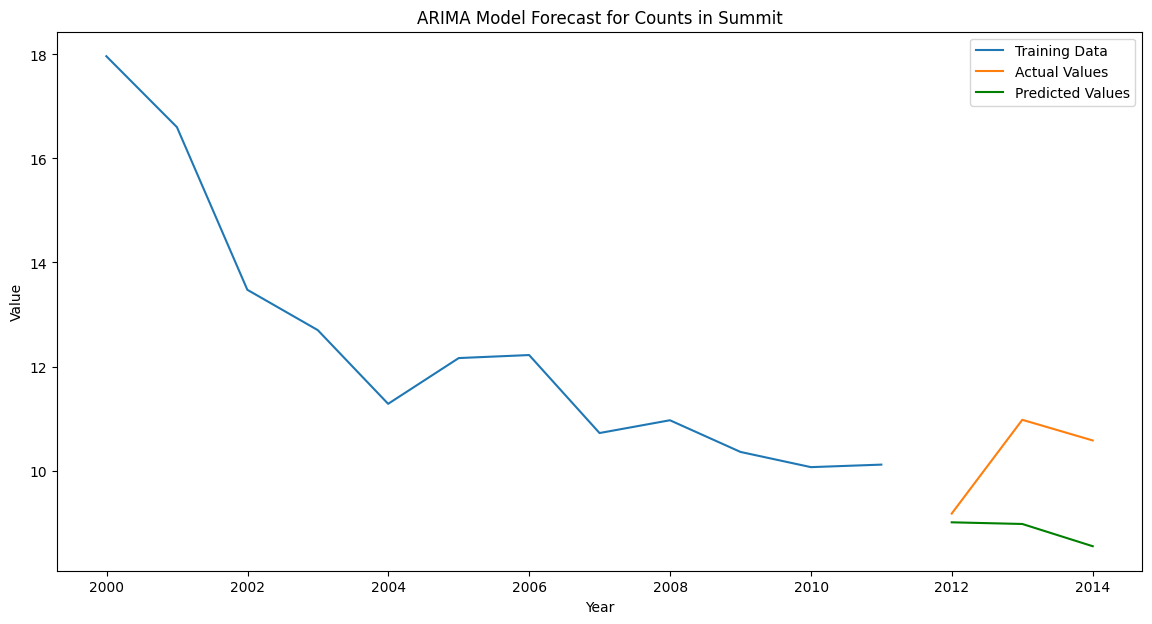


Processing data for county: Santa Barbara
                Value
ReportYear           
2000-12-31   9.906466
2001-12-31  11.765940
2002-12-31  11.438126
2003-12-31  11.003937
2004-12-31  11.656257
2005-12-31  10.893213
2006-12-31  10.949512
2007-12-31  10.514784
2008-12-31  10.960391
2009-12-31   8.923991
2010-12-31   8.693627
2011-12-31   9.177627


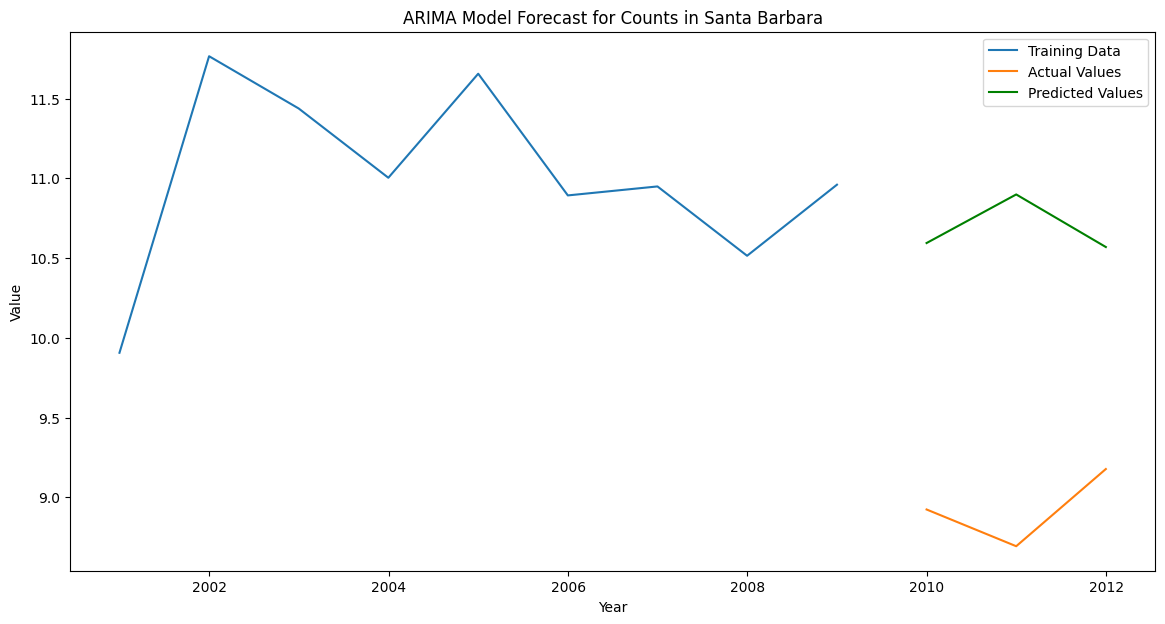

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the data (assuming 'data' is your DataFrame)
# Ensure 'ReportYear' is correctly parsed from the index or a specific column

# If 'ReportYear' is already in the index, ensure it's correctly parsed
if 'ReportYear' not in data.columns:
    data['ReportYear'] = pd.to_datetime(data.index)

# Reset the index to make 'ReportYear' a column
data.reset_index(drop=True, inplace=True)

# Check for unique values in the 'ReportYear' column
unique_years = data['ReportYear'].dt.year.nunique()
unique_years_values = data['ReportYear'].dt.year.unique()

print(f"Number of unique years: {unique_years}")
print("Unique years:", unique_years_values)

# Filter data starting from 1999
data = data[data['ReportYear'].dt.year >= 1999]

# Set 'ReportYear' as the index for the data
data.set_index('ReportYear', inplace=True)

# Check the length of the data
print(f"Length of the data: {len(data)}")

# Function to evaluate ARIMA model and plot the results
def evaluate_arima_model(train, test, county_name, measure_type):
    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(train, label='Training Data')
    plt.plot(test, label='Actual Values')
    plt.plot(forecast, label='Predicted Values', color='green')
    plt.title(f'ARIMA Model Forecast for {measure_type} in {county_name}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Process data for the first 10 counties
selected_counties = data['CountyName'].unique()[:10]  # Adjust the number of counties as needed

for county_name in selected_counties:
    print(f"\nProcessing data for county: {county_name}")

    county_data = data[data['CountyName'] == county_name]

    # No need to set 'ReportYear' as index again, it is already set

    # Isolate the 'Value' column for resampling and interpolation
    value_data = county_data[['Value']]

    # Resample the data to fill missing years and interpolate missing values
    value_data = value_data.resample('A').mean()  # Using annual frequency
    value_data['Value'].interpolate(method='linear', inplace=True)

    # Print the updated data to ensure there are no duplicate years
    print(value_data.head(20))  # Show the first 20 rows for verification

    # Splitting data into training and test sets
    train_size = int(len(value_data) * 0.8)
    train_data, test_data = value_data[0:train_size], value_data[train_size:]

    # Evaluate and plot the ARIMA model
    evaluate_arima_model(train_data, test_data, county_name, 'Counts')


### Logistic Regression for monitor only


Columns in Counts data: Index(['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel',
       'StateFips', 'StateName', 'CountyFips', 'CountyName', 'Value', 'Unit',
       'UnitName', 'DataOrigin', 'MonitorOnly'],
      dtype='object')


<ipython-input-21-43f768232367>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReportYear'] = 2020  # Replace 2020 with the appropriate year or method to derive the year
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set ident

<Figure size 1200x800 with 0 Axes>

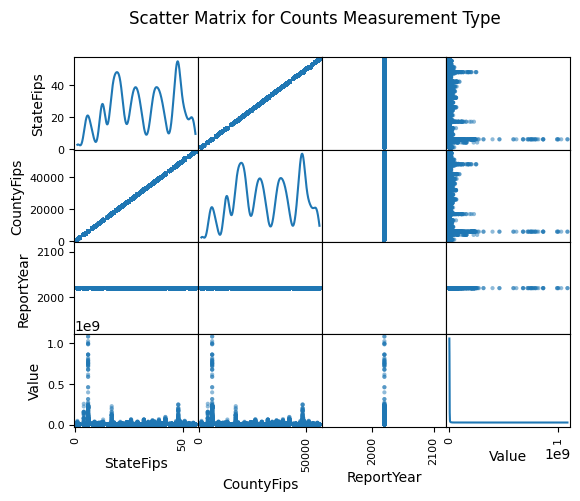

Columns in Percent data: Index(['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel',
       'StateFips', 'StateName', 'CountyFips', 'CountyName', 'Value', 'Unit',
       'UnitName', 'DataOrigin', 'MonitorOnly'],
      dtype='object')


<ipython-input-21-43f768232367>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReportYear'] = 2020  # Replace 2020 with the appropriate year or method to derive the year
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set ident

<Figure size 1200x800 with 0 Axes>

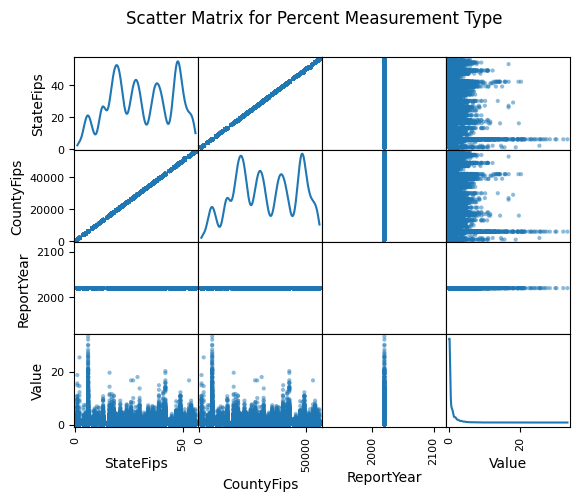

Columns in Average data: Index(['ReportYear', 'MeasureId', 'MeasureName', 'MeasureType',
       'StratificationLevel', 'StateFips', 'StateName', 'CountyFips',
       'CountyName', 'Value', 'Unit', 'UnitName', 'DataOrigin', 'MonitorOnly'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

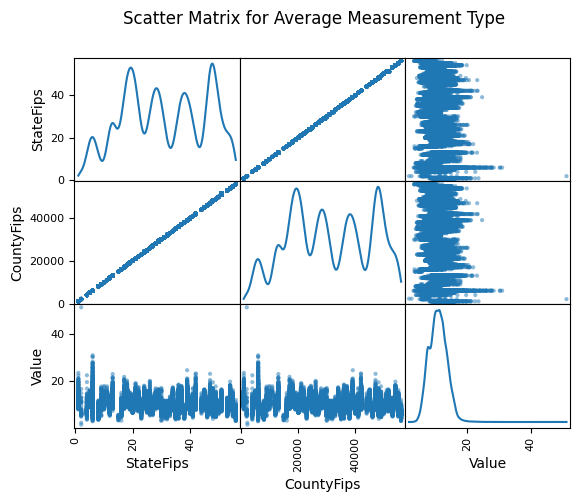

In [21]:
for measure_type, data in segmented_data.items():
    print(f"Columns in {measure_type} data:", data.columns)

    # If 'ReportYear' is missing, you need to add it
    if 'ReportYear' not in data.columns:
        data['ReportYear'] = 2020  # Replace 2020 with the appropriate year or method to derive the year

    # Ensure the necessary columns are present before attempting to subset
    required_columns = ['StateFips', 'CountyFips', 'ReportYear', 'Value']
    if all(col in data.columns for col in required_columns):
        subset_df = data[required_columns]
        plt.figure(figsize=(12, 8))
        scatter_matrix(subset_df, diagonal='kde')
        plt.suptitle(f'Scatter Matrix for {measure_type} Measurement Type')
        plt.show()
    else:
        print(f"Skipping {measure_type} due to missing columns")


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Perform logistic regression for each measurement type
for measure_type, data in segmented_data.items():
    print(f"\n--- Logistic Regression for Measurement Type: {measure_type} ---")

    # Data Preprocessing
    categorical_features = ['MeasureName', 'StateName', 'CountyName', 'Unit', 'UnitName', 'DataOrigin', 'MeasureType', 'StratificationLevel']

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    # Ensure 'ReportYear' is numeric
    if 'ReportYear' in data.columns:
        data['ReportYear'] = pd.to_numeric(data['ReportYear'], errors='coerce')

    # Check for any remaining non-numeric columns
    non_numeric_columns_after = data.select_dtypes(include=['object']).columns
    print(f"Non-numeric columns after dummy conversion: {non_numeric_columns_after}")

    # Feature Selection
    X = data.drop(columns=['MonitorOnly', 'MeasureId'])
    y = data['MonitorOnly']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Training
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = logistic_model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))



--- Logistic Regression for Measurement Type: Counts ---
Non-numeric columns after dummy conversion: Index([], dtype='object')
Confusion Matrix:
[[23415   606]
 [11953  3791]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.79     24021
           1       0.86      0.24      0.38     15744

    accuracy                           0.68     39765
   macro avg       0.76      0.61      0.58     39765
weighted avg       0.74      0.68      0.63     39765


Accuracy Score:
0.6841694957877531

--- Logistic Regression for Measurement Type: Percent ---
Non-numeric columns after dummy conversion: Index([], dtype='object')
Confusion Matrix:
[[8180    0]
 [   0 4861]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8180
           1       1.00      1.00      1.00      4861

    accuracy                           1.00     13041
   macro avg       1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
